In [1]:
import pandas as pd
ds = pd.read_csv('/home/coliewo/Documents/Data Analysis/NPF/Data/SMPS/SMPS_TSI_5min_2024.txt')

# Combine year, month, day, and hour into a single datetime index
ds['datetime'] = pd.to_datetime(
    ds['year'].astype(str) + '-' + 
    ds['month'].astype(str) + '-' + 
    ds['day'].astype(str) + ' ' + 
    ds['hh'].astype(str) + ':' +
    ds['mm'].astype(str) + ':00'
)
ds.set_index('datetime', inplace=True)

# Drop redundant columns
ds.drop(columns=['mdyhms', 'year', 'month', 'day', 'hh', 'mm', 'Unnamed: 1'], inplace=True)

# convert column headers to float
new_column_names = {col: float(col.replace('c', '').replace('_', '.')) for col in ds.columns}

# Rename columns
ds.rename(columns=new_column_names, inplace=True)

In [2]:
# Resample to hourly data
smps_hourly = ds.resample('h').mean()
import numpy as np
smps_hourly = smps_hourly.mask(smps_hourly < 0, np.nan)  # Replace negative values with NaN

smps_hourly

13.10         13.58         14.07         14.59   \
datetime                                                                      
2024-05-27 01:00:00   8811.322333   8678.075917   9266.824917   9377.964333   
2024-05-27 02:00:00   4429.959083   4358.088333   4344.621250   4304.902167   
2024-05-27 03:00:00   3066.354833   3173.748583   3122.135917   2978.556000   
2024-05-27 04:00:00   5049.580833   5031.680750   4982.155250   4965.630667   
2024-05-27 05:00:00  18216.605000  17988.454167  18155.535833  18113.580000   
...                           ...           ...           ...           ...   
2025-01-03 19:00:00   1769.567250   1892.247083   1864.031333   2021.519083   
2025-01-03 20:00:00   1428.189500   1463.220583   1480.338250   1520.237083   
2025-01-03 21:00:00   1987.029000   1965.438667   1840.511083   1710.992583   
2025-01-03 22:00:00   1839.318500   1702.624417   1671.645417   1471.335583   
2025-01-03 23:00:00    924.474000    981.417417    979.036667    949.285333   

                           15.12         15.68         16.25         16.85   \
datetime                                                                      
2024-05-27 01:00:00   9282.293083   9096.008000   9275.907667   9269.819333   
2024-05-27 02:00:00   4136.608167   4028.853417   4032.931750   4203.240667   
2024-05-27 03:00:00   3014.488333   3055.383750   3260.841250   3081.271917   
2024-05-27 04:00:00   4780.458167   4913.020333   4779.355167   4768.674250   
2024-05-27 05:00:00  18312.641667  17653.875833  17703.387500  17534.786667   
...                           ...           ...           ...           ...   
2025-01-03 19:00:00   2054.907917   2101.978917   2260.284583   2452.201833   
2025-01-03 20:00:00   1482.525417   1490.534250   1701.928167   1639.611750   
2025-01-03 21:00:00   1657.355583   1514.403500   1472.869667   1349.815417   
2025-01-03 22:00:00   1449.420417   1366.046000   1315.948833   1322.540667   
2025-01-03 23:00:00    937.774833    909.495750    927.456333    922.119917   

                           17.47         18.11   ...      513.97      532.80  \
datetime                                         ...                           
2024-05-27 01:00:00   9242.619917   9080.413500  ...   42.062333   37.672750   
2024-05-27 02:00:00   4163.286417   4235.815500  ...   21.677333   20.849500   
2024-05-27 03:00:00   3178.804167   3182.493583  ...   12.386250   14.479833   
2024-05-27 04:00:00   4823.262333   4806.402583  ...   19.427250   16.303000   
2024-05-27 05:00:00  17150.619167  16700.647500  ...   36.383833   26.155583   
...                           ...           ...  ...         ...         ...   
2025-01-03 19:00:00   2500.159250   2454.345000  ...  218.366417  193.862333   
2025-01-03 20:00:00   1628.718250   1701.716833  ...  213.268583  156.107167   
2025-01-03 21:00:00   1365.158417   1309.541000  ...  172.406083  141.855500   
2025-01-03 22:00:00   1318.180750   1266.311500  ...  156.634417  120.422250   
2025-01-03 23:00:00    916.401250    962.751167  ...  150.482167  126.027333   

                         552.32      572.55      593.52     615.27     637.80  \
datetime                                                                        
2024-05-27 01:00:00   24.605417   23.219667   24.000083  21.997500  13.720667   
2024-05-27 02:00:00   12.708333   11.025167   11.292417   8.359833   7.153250   
2024-05-27 03:00:00   14.915417   10.642083    8.877083   6.728333   7.200750   
2024-05-27 04:00:00   17.123083    7.431333    8.557583   7.472333   8.061667   
2024-05-27 05:00:00   24.751750   21.312917   19.476167  15.328667  15.482500   
...                         ...         ...         ...        ...        ...   
2025-01-03 19:00:00  164.756083  126.092667  103.537417  73.870167  62.510500   
2025-01-03 20:00:00  132.042500   95.857833   76.836000  65.078667  51.679500   
2025-01-03 21:00:00  115.529167   85.373750   58.416333  59.319083  37.506667   
2025-01-03 22:00:00  102.429167   81.61

In [5]:
from nais.utils import remove_bad_data
import xarray as xr

df = xr.open_dataset("nais1_dataset.nc")
bad_data = xr.open_dataset("bad_data_bounds.nc")
df = remove_bad_data(df, bad_data)

#Using the positively charged particles since the SMPS data is also +vely charged particles
nais_pos_particles = df['pos_particles'].to_dataframe(name='particles').reset_index()
# Unstack the particles dimension to get a DataFrame with the diameter as columns
nais_pos_particles = nais_pos_particles.pivot(index='time', columns='diameter', values='particles')
import numpy as np
nais_pos_particles = nais_pos_particles.mask(nais_pos_particles < 0, np.nan)  # Replace negative values with NaN
nais_pos_particles

diameter             8.028800e-10  8.628290e-10  9.272542e-10  9.961534e-10  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00           NaN           NaN           NaN           NaN   
2025-01-31 21:00:00           NaN           NaN           NaN           NaN   
2025-01-31 22:00:00           NaN           NaN           NaN           NaN   
2025-01-31 23:00:00           NaN           NaN           NaN           NaN   
2025-02-01 00:00:00           NaN           NaN           NaN           NaN   

diameter             1.070172e-09  1.151195e-09  1.238353e-09  1.330049e-09  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00           NaN           NaN           NaN           NaN   
2025-01-31 21:00:00           NaN           NaN           NaN           NaN   
2025-01-31 22:00:00           NaN           NaN           NaN           NaN   
2025-01-31 23:00:00           NaN           NaN           NaN           NaN   
2025-02-01 00:00:00           NaN           NaN           NaN           NaN   

diameter             1.428535e-09  1.535309e-09  ...  2.107146e-08  \
time                                             ...                 
2024-05-16 00:00:00           NaN           NaN  ...           NaN   
2024-05-16 01:00:00           NaN           NaN  ...           NaN   
2024-05-16 02:00:00           NaN           NaN  ...           NaN   
2024-05-16 03:00:00           NaN           NaN  ...           NaN   
2024-05-16 04:00:00           NaN           NaN  ...           NaN   
...                           ...           ...  ...           ...   
2025-01-31 20:00:00           NaN           NaN  ...   5569.386022   
2025-01-31 21:00:00           NaN           NaN  ...   6670.259334   
2025-01-31 22:00:00           NaN           NaN  ...   7609.469967   
2025-01-31 23:00:00           NaN           NaN  ...   4153.578561   
2025-02-01 00:00:00           NaN           NaN  ...   2921.307506   

diameter             2.268812e-08  2.445574e-08  2.636108e-08  2.841614e-08  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00   5818.297681   5985.596865   6026.877014   6313.385141   
2025-01-31 21:00:00   7217.000305   7999.913764   9308.262764  10895.869749   
2025-01-31 22:00:00   8418.538885   9189.833852  10021.773610  10386.221059   
2025-01-31 23:00:00   4123.542294   4208.404594   4872.754468   5721.442060   
2025-02-01 00:00:00   3225.442100   3558.830118   3989.546212   4403.947940   

diame

In [6]:
# lets have the diameters in nm similar to SMPS data
nais_pos_particles.columns = nais_pos_particles.columns * 1e9
nais_pos_particles

diameter             0.802880   0.862829   0.927254   0.996153   1.070172   \
time                                                                         
2024-05-16 00:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 01:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 02:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 03:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 04:00:00        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2025-01-31 20:00:00        NaN        NaN        NaN        NaN        NaN   
2025-01-31 21:00:00        NaN        NaN        NaN        NaN        NaN   
2025-01-31 22:00:00        NaN        NaN        NaN        NaN        NaN   
2025-01-31 23:00:00        NaN        NaN        NaN        NaN        NaN   
2025-02-01 00:00:00        NaN        NaN        NaN        NaN        NaN   

diameter             1.151195   1.238353   1.330049   1.428535   1.535309   \
time                                                                         
2024-05-16 00:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 01:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 02:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 03:00:00        NaN        NaN        NaN        NaN        NaN   
2024-05-16 04:00:00        NaN        NaN        NaN        NaN        NaN   
...                        ...        ...        ...        ...        ...   
2025-01-31 20:00:00        NaN        NaN        NaN        NaN        NaN   
2025-01-31 21:00:00        NaN        NaN        NaN        NaN        NaN   
2025-01-31 22:00:00        NaN        NaN        NaN        NaN        NaN   
2025-01-31 23:00:00        NaN        NaN        NaN        NaN        NaN   
2025-02-01 00:00:00        NaN        NaN        NaN        NaN        NaN   

diameter             ...    21.071455    22.688121    24.455744     26.361081  \
time                 ...                                                        
2024-05-16 00:00:00  ...          NaN          NaN          NaN           NaN   
2024-05-16 01:00:00  ...          NaN          NaN          NaN           NaN   
2024-05-16 02:00:00  ...          NaN          NaN          NaN           NaN   
2024-05-16 03:00:00  ...          NaN          NaN          NaN           NaN   
2024-05-16 04:00:00  ...          NaN          NaN          NaN           NaN   
...                  ...          ...          ...          ...           ...   
2025-01-31 20:00:00  ...  5569.386022  5818.297681  5985.596865   6026.877014   
2025-01-31 21:00:00  ...  6670.259334  7217.000305  7999.913764   9308.262764   
2025-01-31 22:00:00  ...  7609.469967  8418.538885  9189.833852  10021.773610   
2025-01-31 23:00:00  ...  4153.578561  4123.542294  4208.404594   4872.754468   
2025-02-01 00:00:00  ...  2921.307506  3225.442100  3558.830118   3989.546212   

diameter                28.416142     30.631412     33.024833     35.605267  \
time                                                                          
2024-05-16 00:00:00           NaN           NaN           NaN           NaN   
2024-05-16 01:00:00           NaN           NaN           NaN           NaN   
2024-05-16 02:00:00           NaN           NaN           NaN           NaN   
2024-05-16 03:00:00           NaN           NaN           NaN           NaN   
2024-05-16 04:00:00           NaN           NaN           NaN           NaN   
...                           ...           ...           ...           ...   
2025-01-31 20:00:00   6313.385141   8043.043951   9832.804478  12143.224782   
2025-01-31 21:00:00  10895.869749  12874.185007  14503.938546  15430.285698   
2025-01-31 22:00:00  10386.221059  11135.068141  12865.675468  14942.223550   
2025-01-31 23:00:00   5721.442060   6881.212992

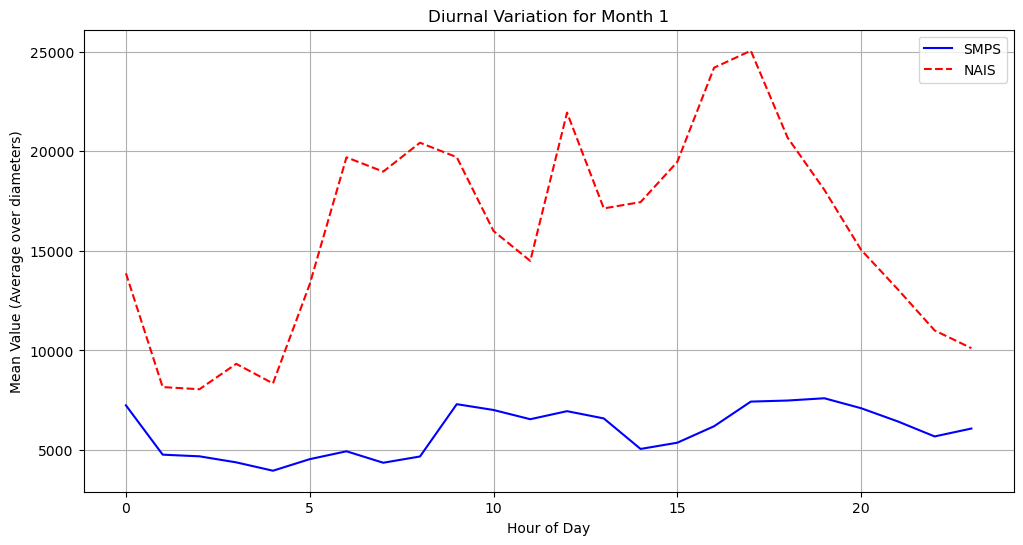

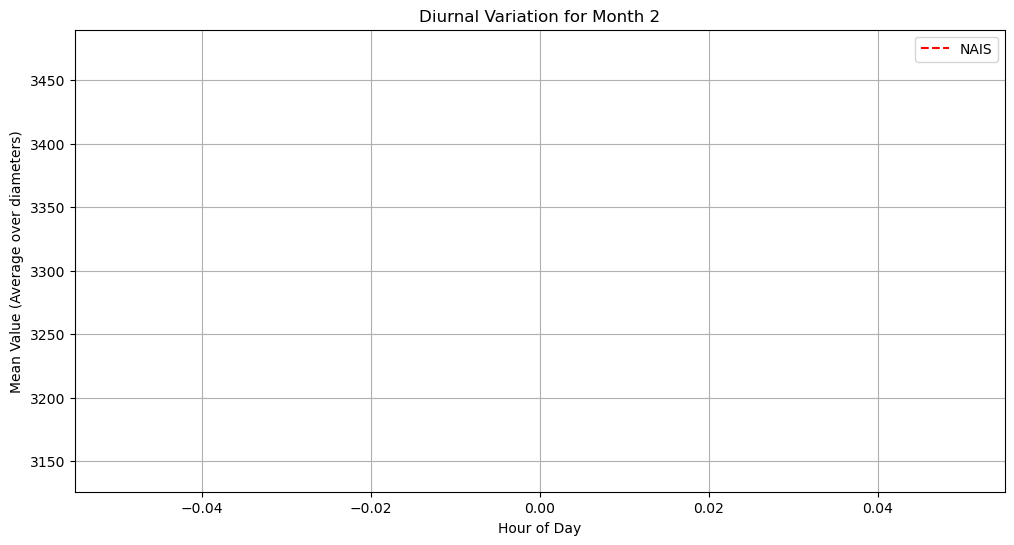

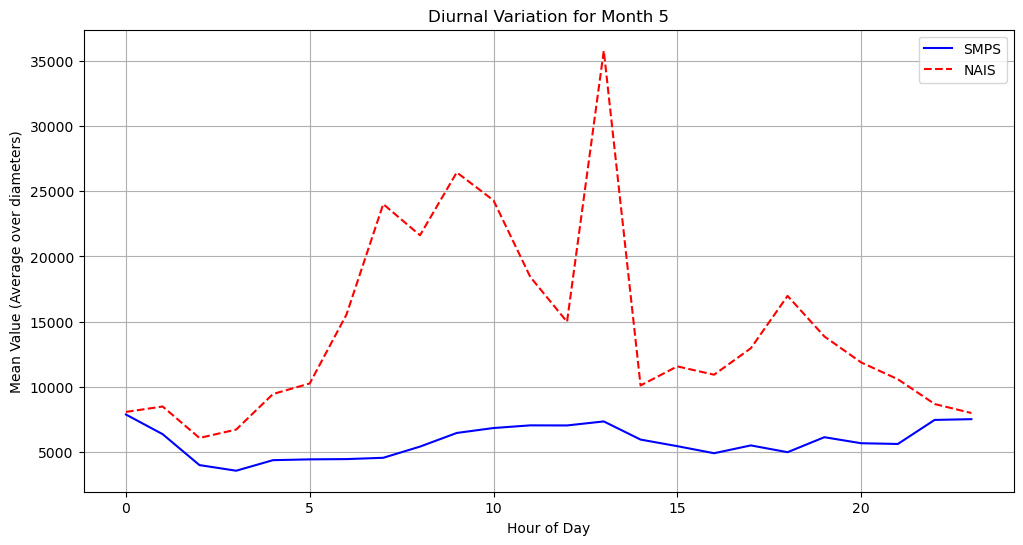

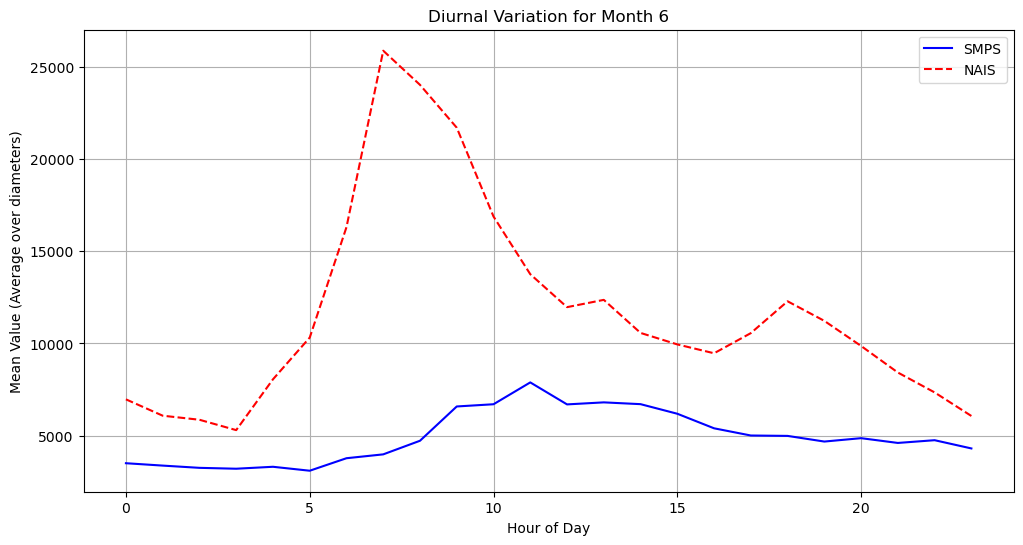

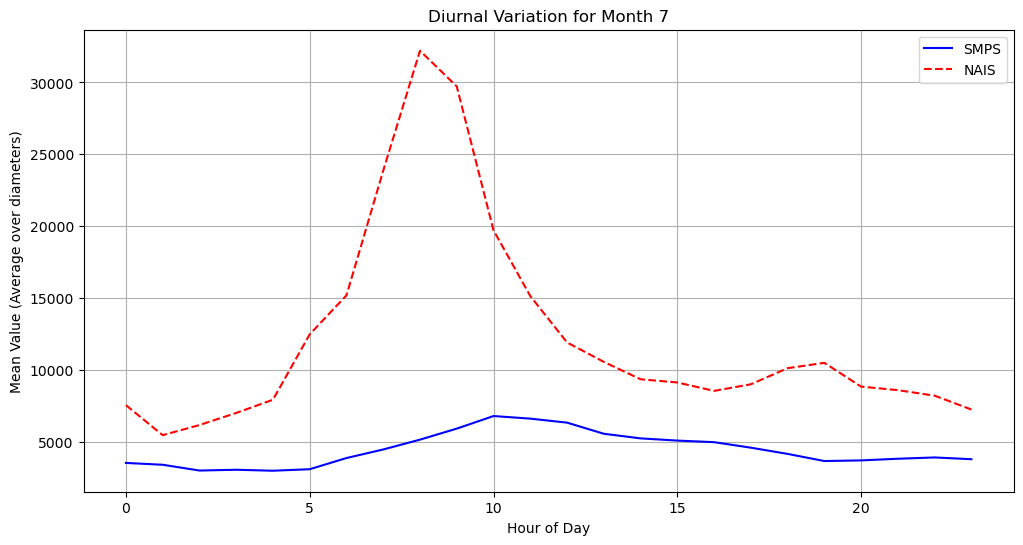

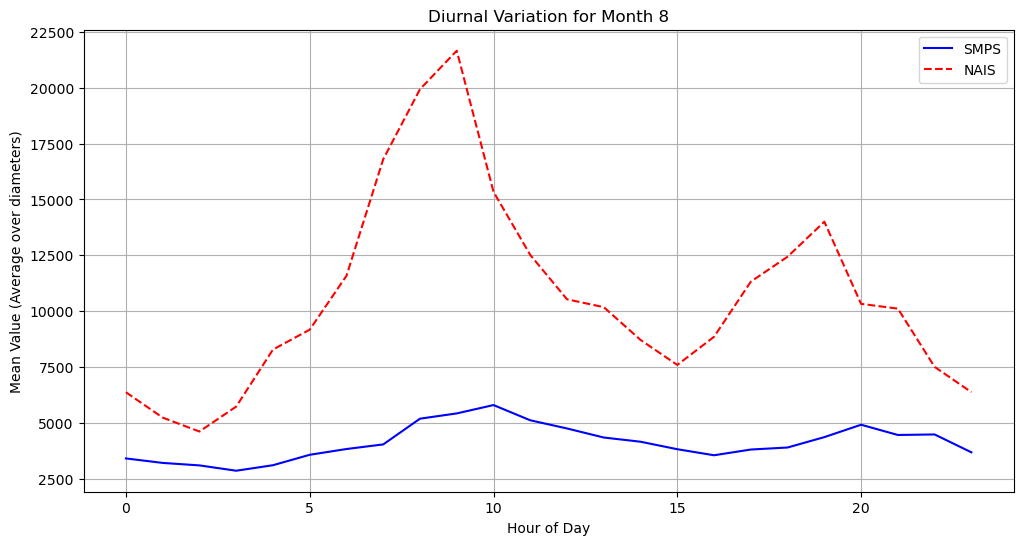

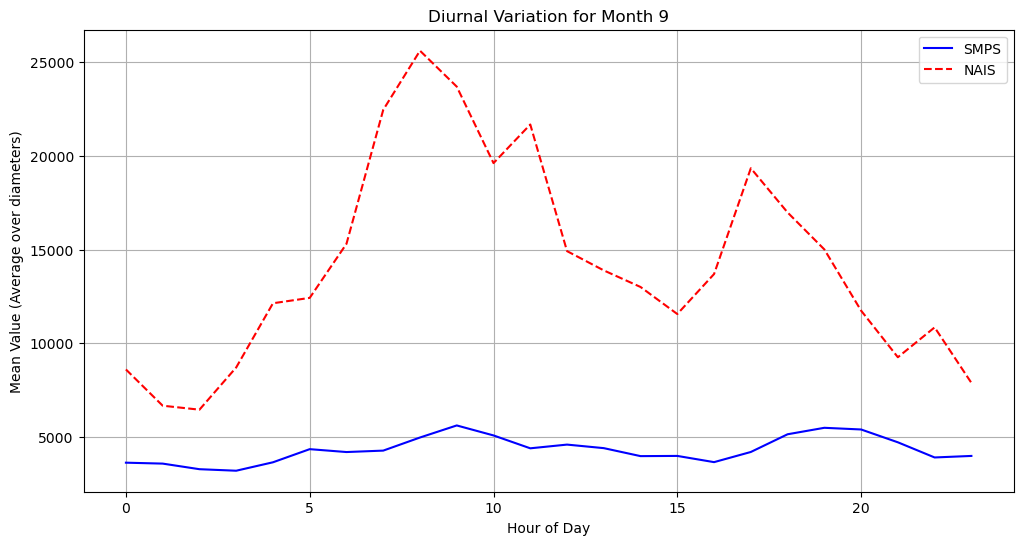

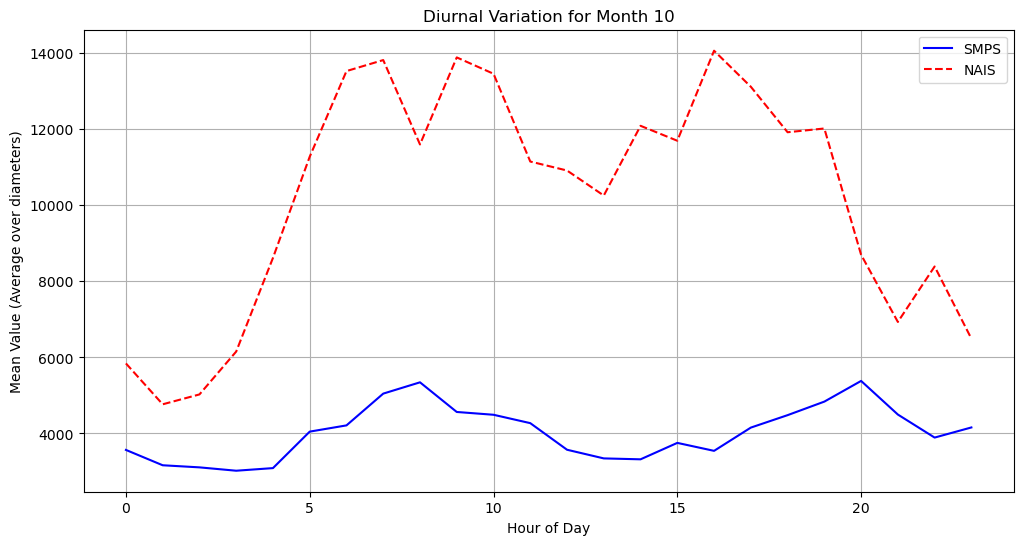

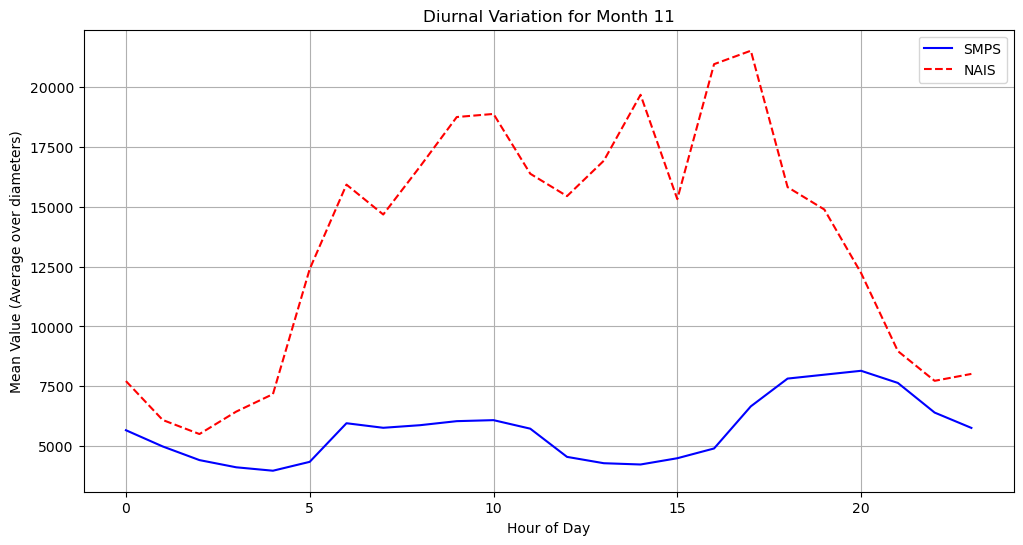

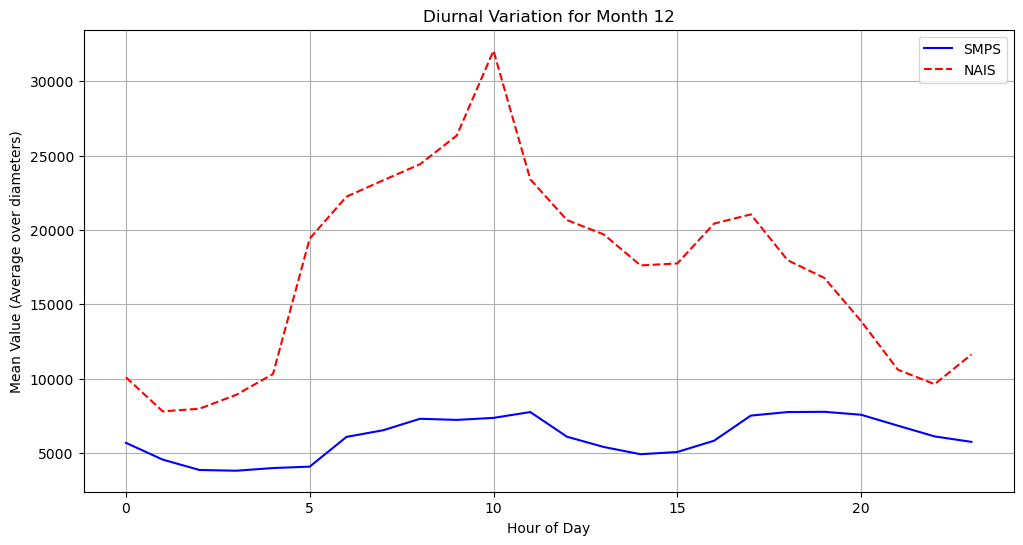

In [8]:
import matplotlib.pyplot as plt

# Group by month and hour using the datetime index attributes directly
df1_grouped = smps_hourly.groupby([smps_hourly.index.month, smps_hourly.index.hour]).mean()
df2_grouped = nais_pos_particles.groupby([nais_pos_particles.index.month, nais_pos_particles.index.hour]).mean()

# Loop through each month (1 to 12)
for month in range(1, 13):
    # Skip month if neither dataframe has data for it
    if month not in df1_grouped.index.levels[0] and month not in df2_grouped.index.levels[0]:
        continue

    plt.figure(figsize=(12, 6))
    
    # Plot for smps_hourly if data is available
    if month in df1_grouped.index.levels[0]:
        df1_month = df1_grouped.loc[month]
        # Compute the mean across all diameter columns (averaging over axis=1)
        df1_avg = df1_month.mean(axis=1)
        plt.plot(df1_avg.index, df1_avg, label='SMPS', color='blue')
    
    # Plot for nais_pos_particles if data is available
    if month in df2_grouped.index.levels[0]:
        df2_month = df2_grouped.loc[month]
        df2_avg = df2_month.mean(axis=1)
        plt.plot(df2_avg.index, df2_avg, label='NAIS', color='red', linestyle='--')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Value (Average over diameters)')
    plt.title(f'Diurnal Variation for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.show()


### try UTC+1

In [10]:
import pytz

# Use Italy's DST-aware timezone
italy_tz = pytz.timezone('Europe/Rome')

# Step 1: Localize the index using Italy's timezone.
# Note: 'ambiguous' may need to be specified if your index contains times
# during the DST transition (fall back). 'infer' tries to resolve the ambiguity.
smps_italytime = smps_hourly.copy()
smps_italytime.index = smps_italytime.index.tz_localize(italy_tz, ambiguous='NaT')

# Step 2: Convert the timezone to UTC
smps_italytime.index = smps_italytime.index.tz_convert(pytz.utc)

# Step 3: Optionally, remove the timezone information if needed
smps_italytime.index = smps_italytime.index.tz_localize(None)
smps_italytime

13.10         13.58         14.07         14.59   \
datetime                                                                      
2024-05-26 23:00:00   8811.322333   8678.075917   9266.824917   9377.964333   
2024-05-27 00:00:00   4429.959083   4358.088333   4344.621250   4304.902167   
2024-05-27 01:00:00   3066.354833   3173.748583   3122.135917   2978.556000   
2024-05-27 02:00:00   5049.580833   5031.680750   4982.155250   4965.630667   
2024-05-27 03:00:00  18216.605000  17988.454167  18155.535833  18113.580000   
...                           ...           ...           ...           ...   
2025-01-03 18:00:00   1769.567250   1892.247083   1864.031333   2021.519083   
2025-01-03 19:00:00   1428.189500   1463.220583   1480.338250   1520.237083   
2025-01-03 20:00:00   1987.029000   1965.438667   1840.511083   1710.992583   
2025-01-03 21:00:00   1839.318500   1702.624417   1671.645417   1471.335583   
2025-01-03 22:00:00    924.474000    981.417417    979.036667    949.285333   

                           15.12         15.68         16.25         16.85   \
datetime                                                                      
2024-05-26 23:00:00   9282.293083   9096.008000   9275.907667   9269.819333   
2024-05-27 00:00:00   4136.608167   4028.853417   4032.931750   4203.240667   
2024-05-27 01:00:00   3014.488333   3055.383750   3260.841250   3081.271917   
2024-05-27 02:00:00   4780.458167   4913.020333   4779.355167   4768.674250   
2024-05-27 03:00:00  18312.641667  17653.875833  17703.387500  17534.786667   
...                           ...           ...           ...           ...   
2025-01-03 18:00:00   2054.907917   2101.978917   2260.284583   2452.201833   
2025-01-03 19:00:00   1482.525417   1490.534250   1701.928167   1639.611750   
2025-01-03 20:00:00   1657.355583   1514.403500   1472.869667   1349.815417   
2025-01-03 21:00:00   1449.420417   1366.046000   1315.948833   1322.540667   
2025-01-03 22:00:00    937.774833    909.495750    927.456333    922.119917   

                           17.47         18.11   ...      513.97      532.80  \
datetime                                         ...                           
2024-05-26 23:00:00   9242.619917   9080.413500  ...   42.062333   37.672750   
2024-05-27 00:00:00   4163.286417   4235.815500  ...   21.677333   20.849500   
2024-05-27 01:00:00   3178.804167   3182.493583  ...   12.386250   14.479833   
2024-05-27 02:00:00   4823.262333   4806.402583  ...   19.427250   16.303000   
2024-05-27 03:00:00  17150.619167  16700.647500  ...   36.383833   26.155583   
...                           ...           ...  ...         ...         ...   
2025-01-03 18:00:00   2500.159250   2454.345000  ...  218.366417  193.862333   
2025-01-03 19:00:00   1628.718250   1701.716833  ...  213.268583  156.107167   
2025-01-03 20:00:00   1365.158417   1309.541000  ...  172.406083  141.855500   
2025-01-03 21:00:00   1318.180750   1266.311500  ...  156.634417  120.422250   
2025-01-03 22:00:00    916.401250    962.751167  ...  150.482167  126.027333   

                         552.32      572.55      593.52     615.27     637.80  \
datetime                                                                        
2024-05-26 23:00:00   24.605417   23.219667   24.000083  21.997500  13.720667   
2024-05-27 00:00:00   12.708333   11.025167   11.292417   8.359833   7.153250   
2024-05-27 01:00:00   14.915417   10.642083    8.877083   6.728333   7.200750   
2024-05-27 02:00:00   17.123083    7.431333    8.557583   7.472333   8.061667   
2024-05-27 03:00:00   24.751750   21.312917   19.476167  15.328667  15.482500   
...                         ...         ...         ...        ...        ...   
2025-01-03 18:00:00  164.756083  126.092667  103.537417  73.870167  62.510500   
2025-01-03 19:00:00  132.042500   95.857833   76.836000  65.078667  51.679500   
2025-01-03 20:00:00  115.529167   85.373750   58.416333  59.319083  37.506667   
2025-01-03 21:00:00  102.429167   81.61

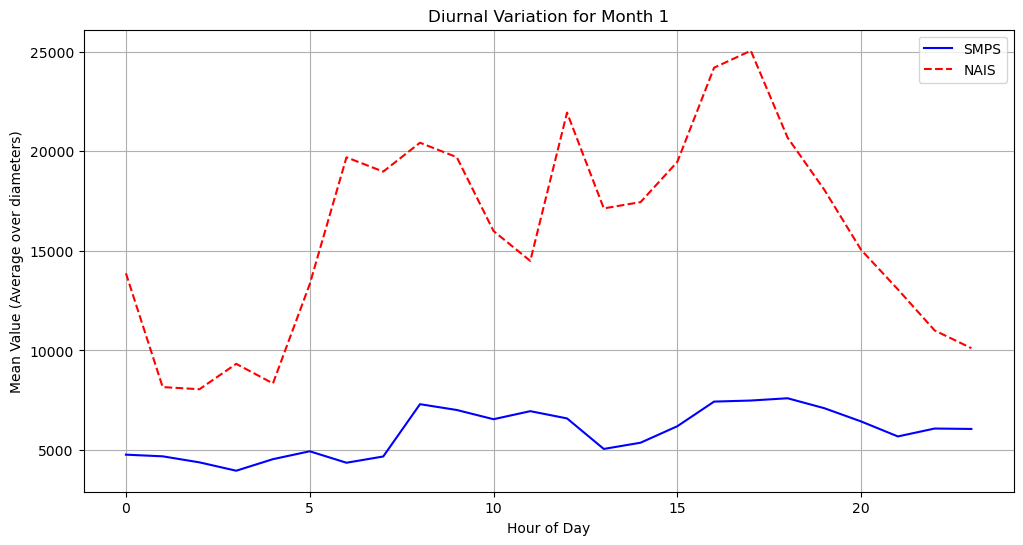

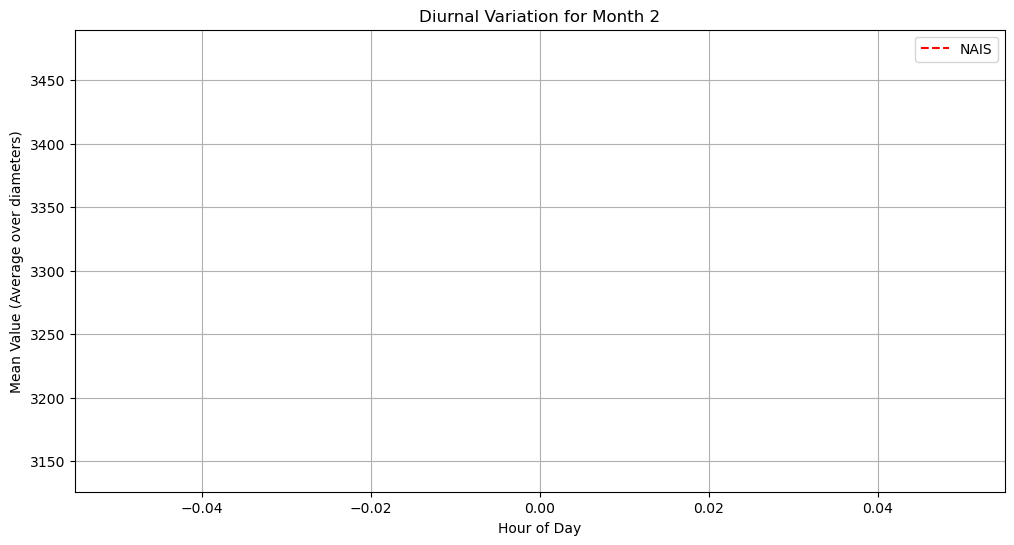

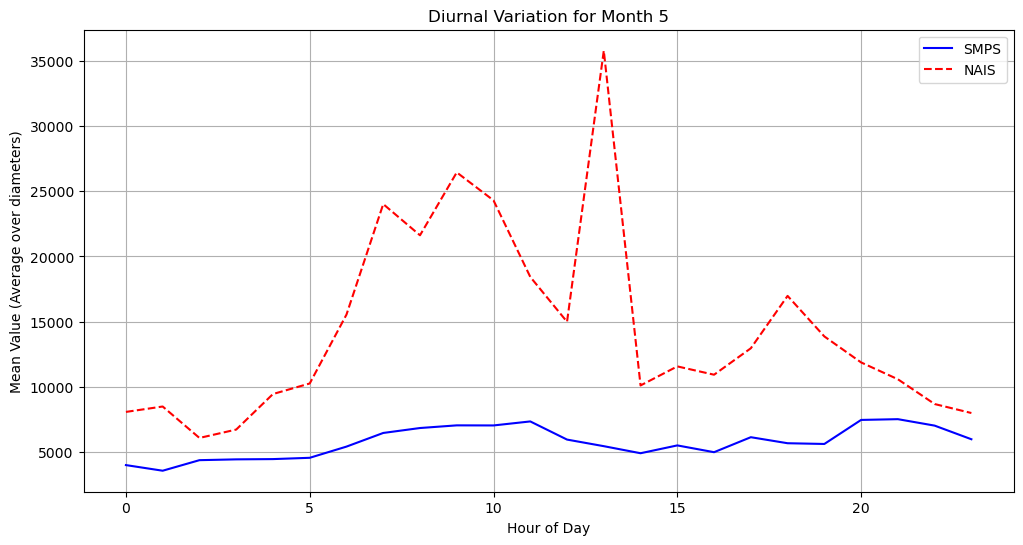

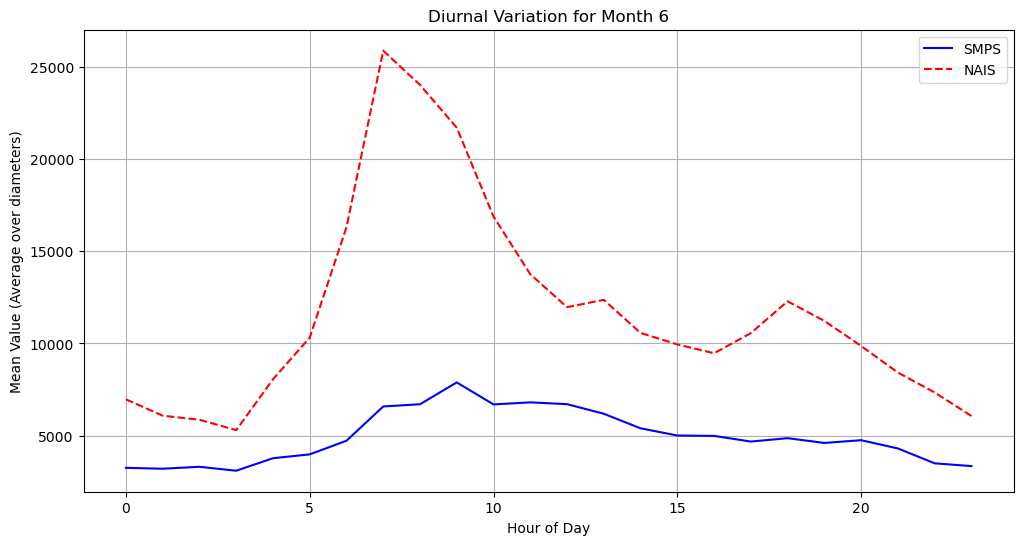

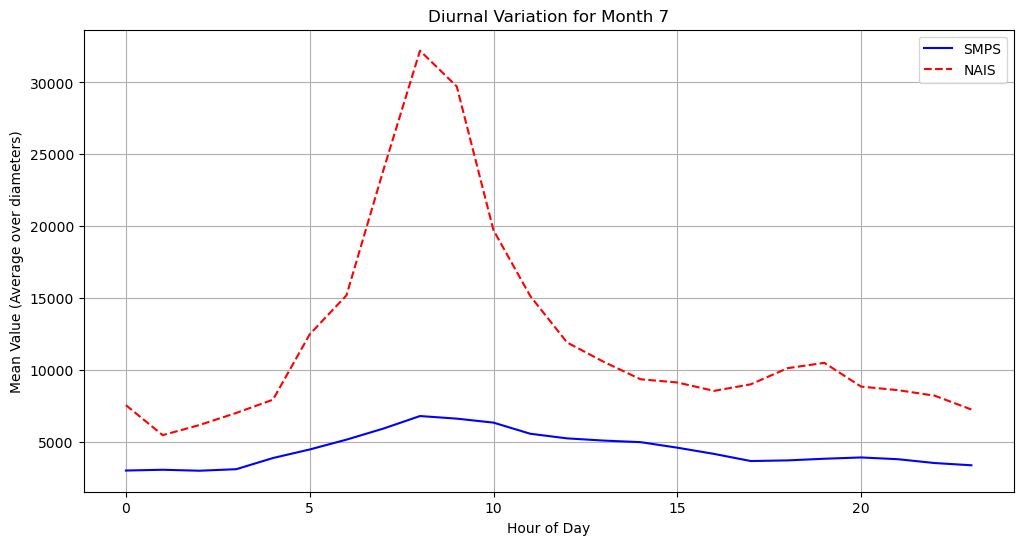

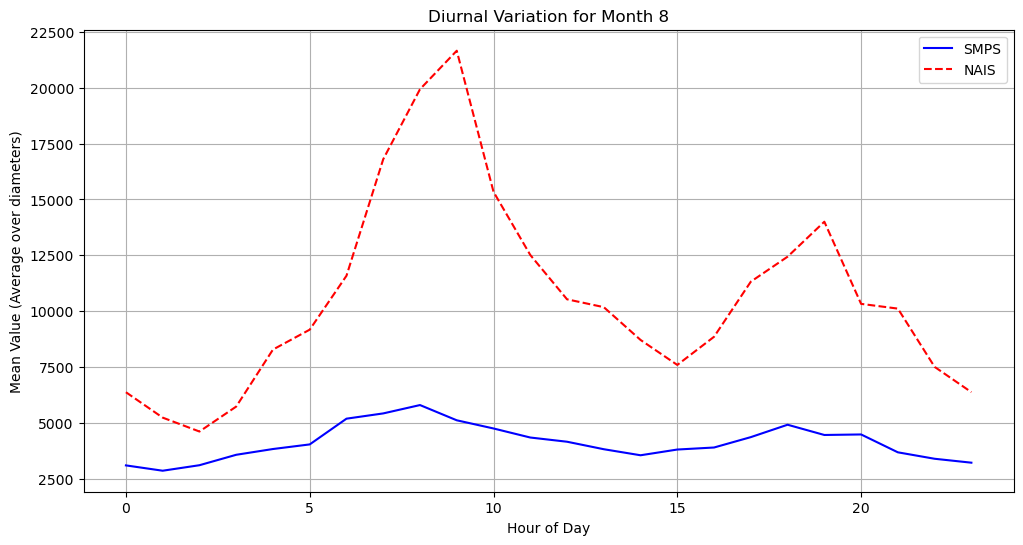

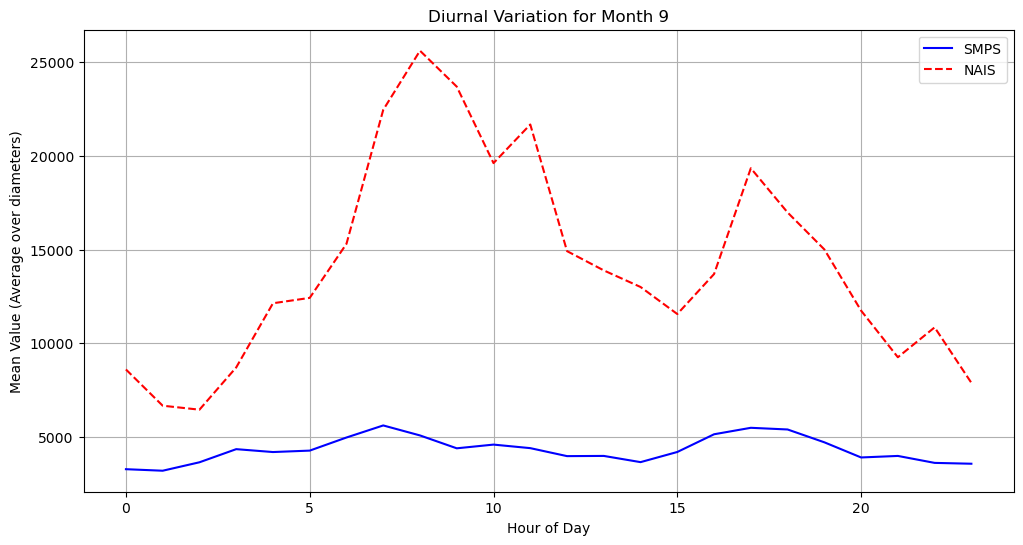

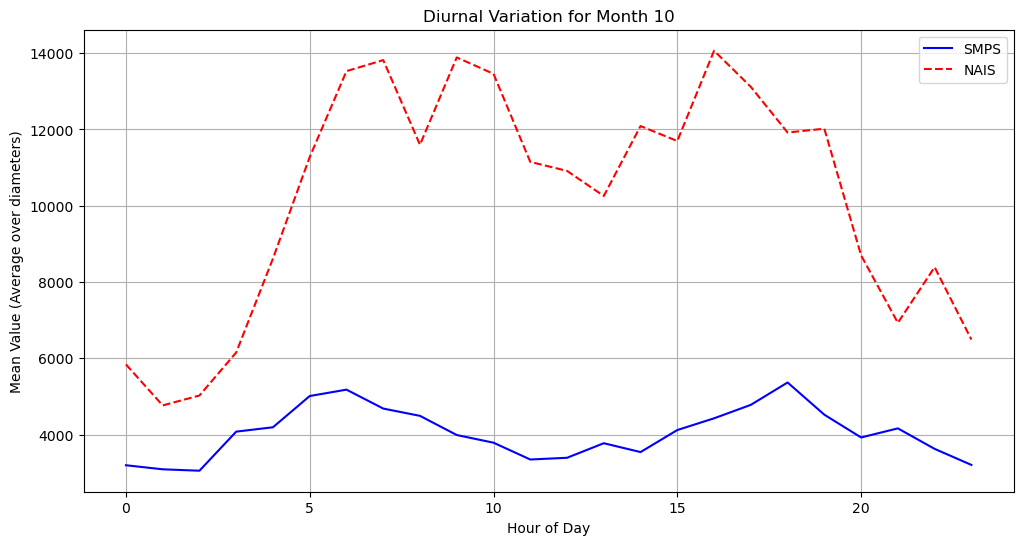

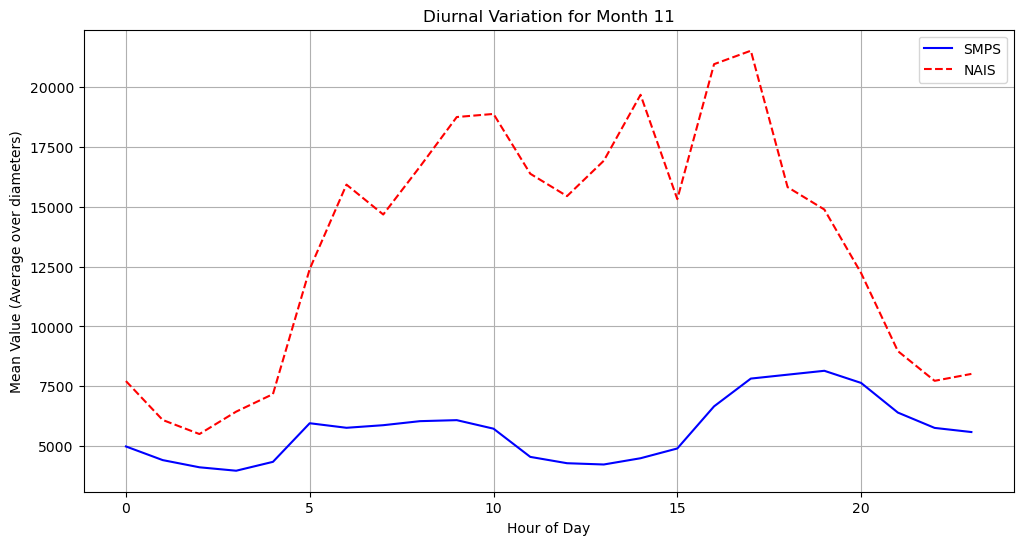

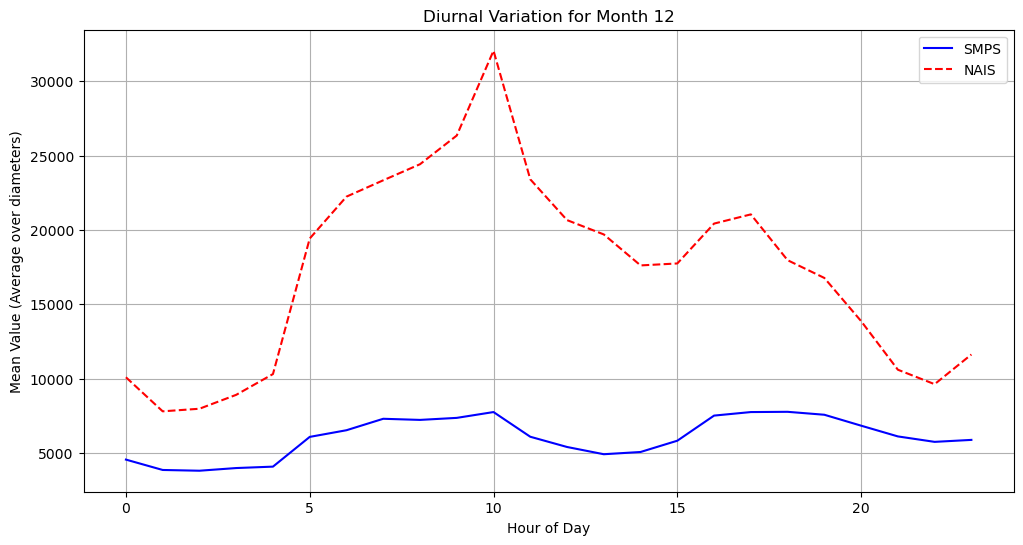

In [11]:
import matplotlib.pyplot as plt

# Group by month and hour using the datetime index attributes directly
df1_grouped = smps_italytime.groupby([smps_italytime.index.month, smps_italytime.index.hour]).mean()
df2_grouped = nais_pos_particles.groupby([nais_pos_particles.index.month, nais_pos_particles.index.hour]).mean()

# Loop through each month (1 to 12)
for month in range(1, 13):
    # Skip month if neither dataframe has data for it
    if month not in df1_grouped.index.levels[0] and month not in df2_grouped.index.levels[0]:
        continue

    plt.figure(figsize=(12, 6))
    
    # Plot for smps_italytime if data is available
    if month in df1_grouped.index.levels[0]:
        df1_month = df1_grouped.loc[month]
        # Compute the mean across all diameter columns (averaging over axis=1)
        df1_avg = df1_month.mean(axis=1)
        plt.plot(df1_avg.index, df1_avg, label='SMPS', color='blue')
    
    # Plot for nais_pos_particles if data is available
    if month in df2_grouped.index.levels[0]:
        df2_month = df2_grouped.loc[month]
        df2_avg = df2_month.mean(axis=1)
        plt.plot(df2_avg.index, df2_avg, label='NAIS', color='red', linestyle='--')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Value (Average over diameters)')
    plt.title(f'Diurnal Variation for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.show()


### Compare only in the overlapping diameters

In [12]:
# If the column names are numbers or can be converted to numbers:
# For nais:
selected_cols_df1 = [col for col in nais_pos_particles.columns if 13 <= float(col) <= 42]
df1_subset = nais_pos_particles[selected_cols_df1]

# For smps as given:
selected_cols_df2 = [col for col in smps_hourly.columns if 13 <= float(col) <= 42]
df2_subset = smps_hourly[selected_cols_df2]

# smps adjusted for italy time
selected_cols_df3 = [col for col in smps_italytime.columns if 13 <= float(col) <= 42]
df3_subset = smps_italytime[selected_cols_df3]

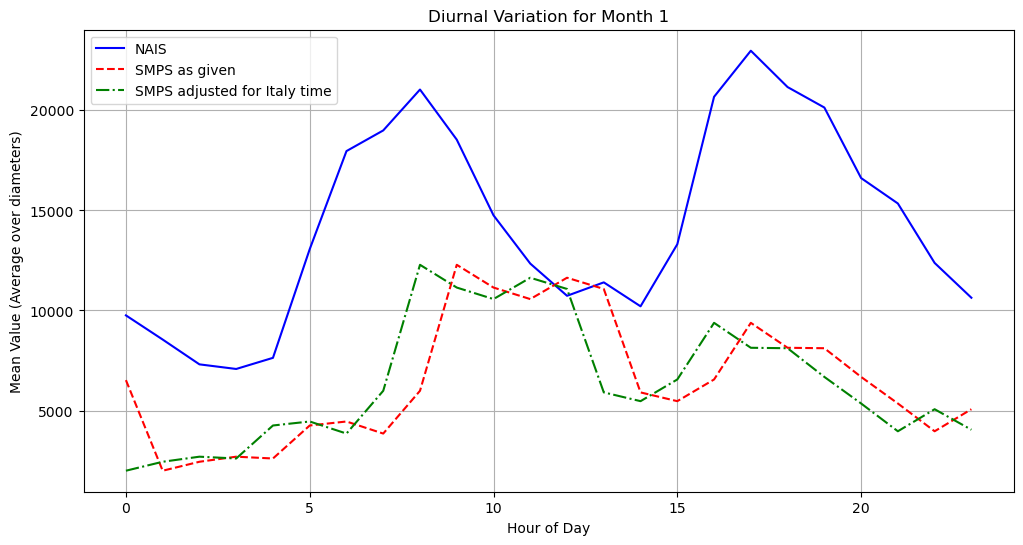

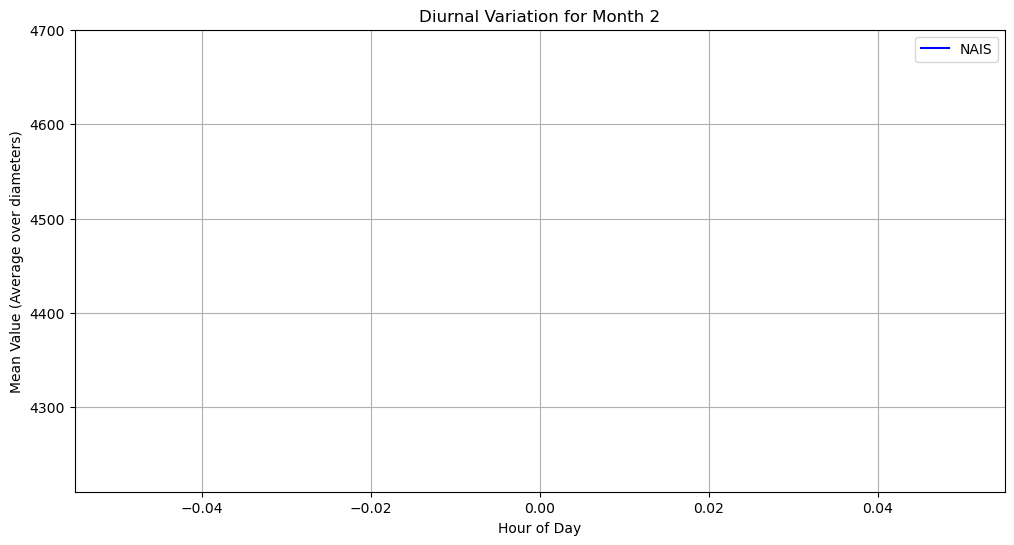

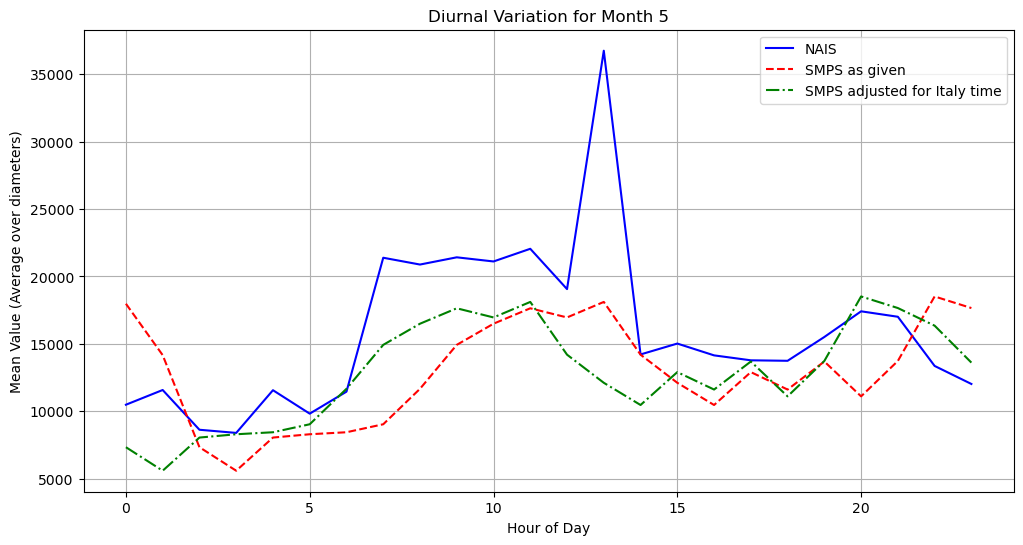

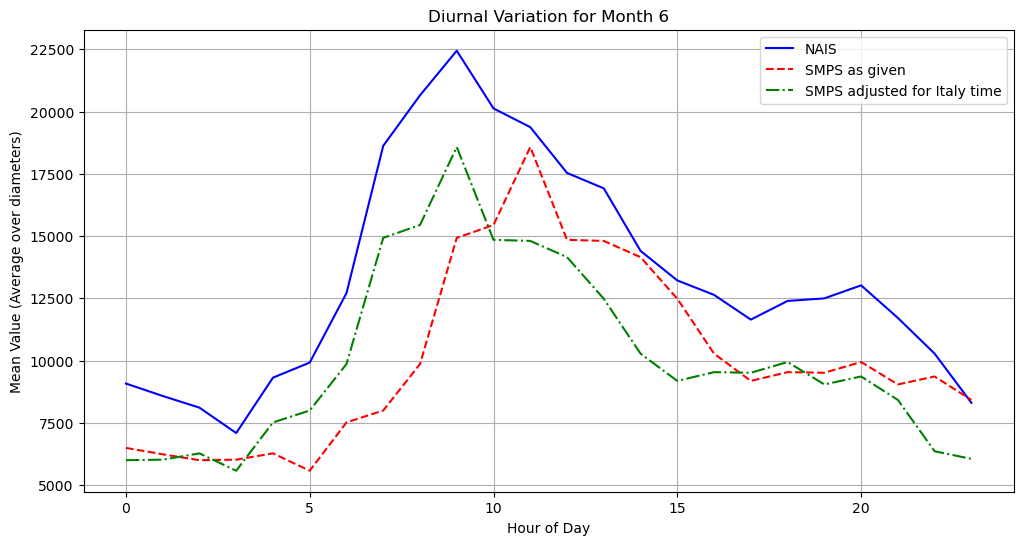

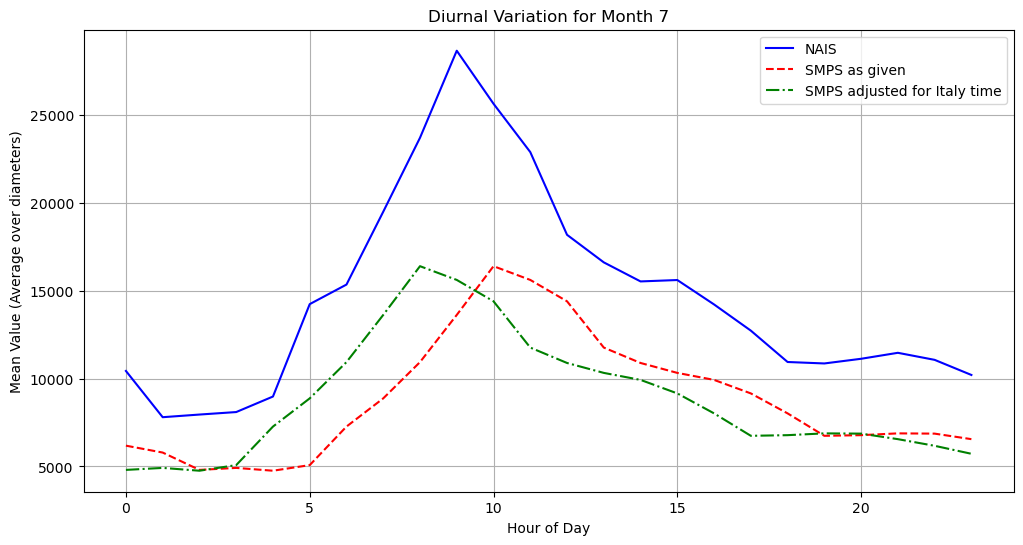

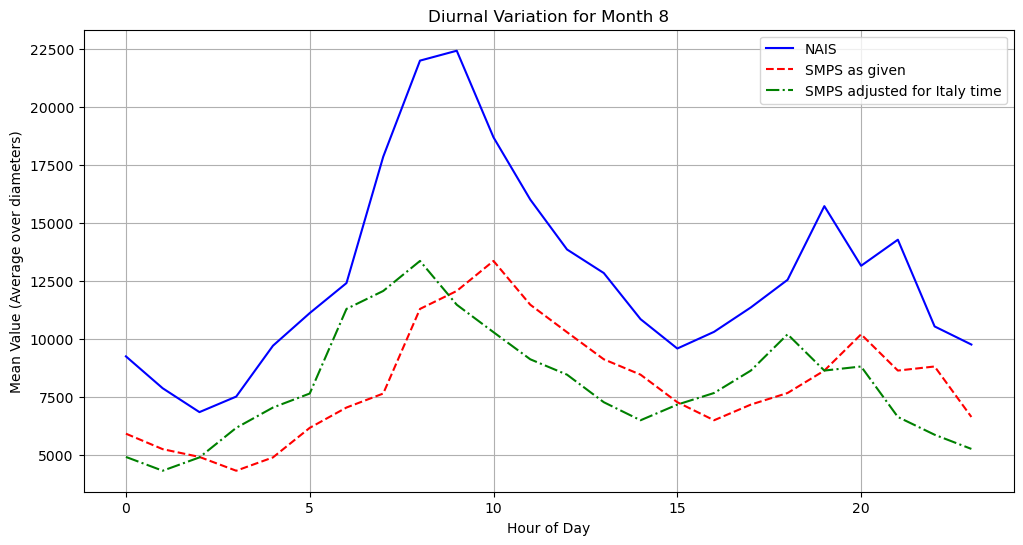

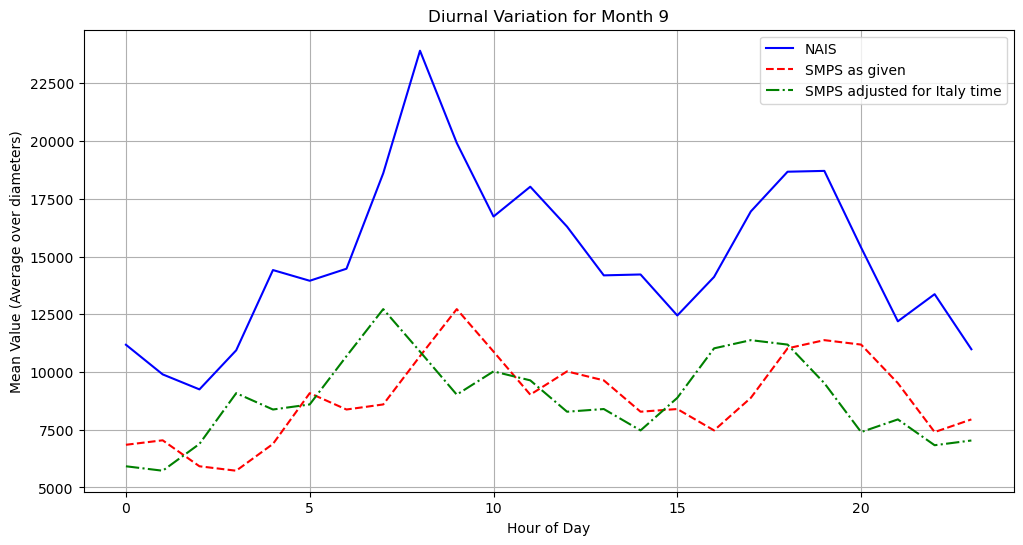

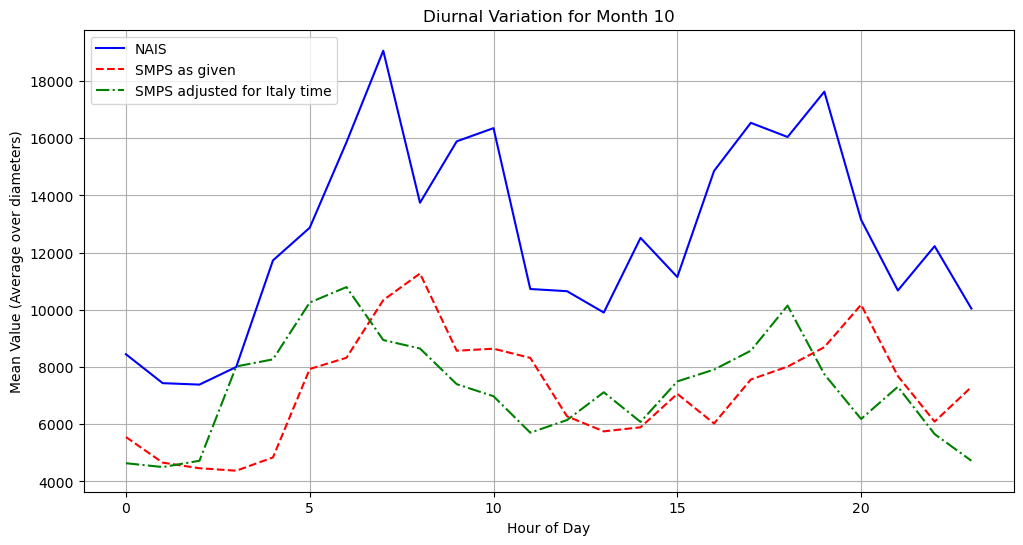

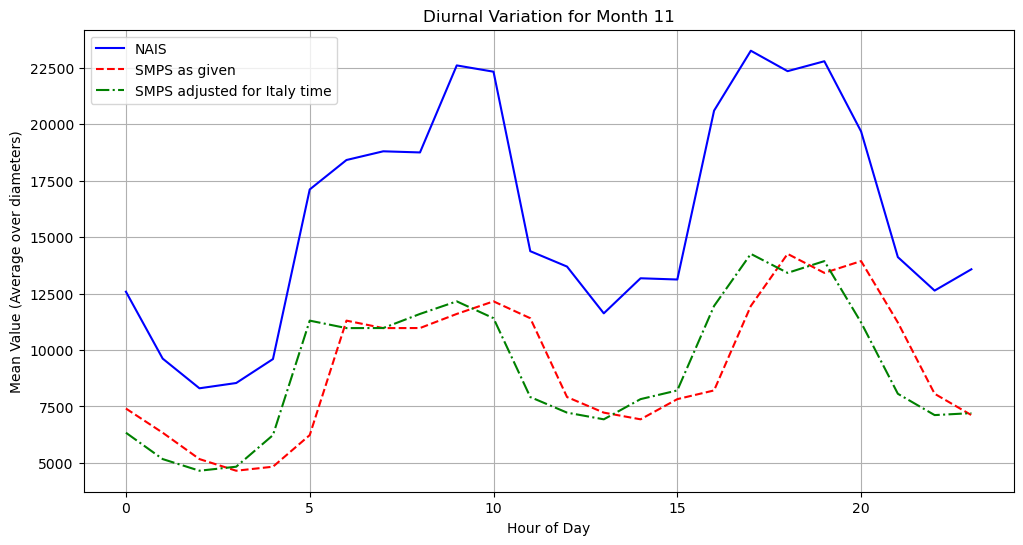

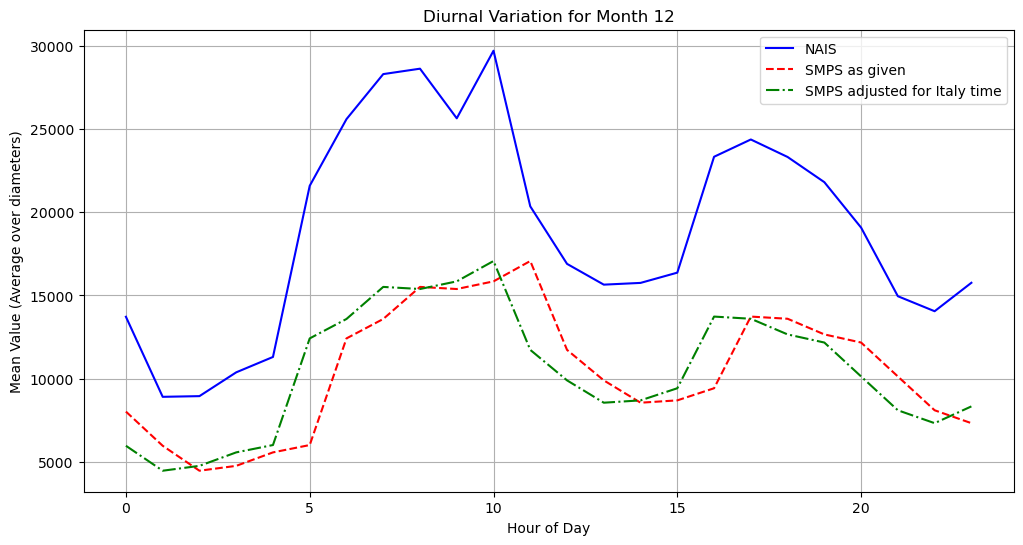

In [13]:
import matplotlib.pyplot as plt

# Group by month and hour using the datetime index attributes directly
df1_grouped = df1_subset.groupby([df1_subset.index.month, df1_subset.index.hour]).mean()
df2_grouped = df2_subset.groupby([df2_subset.index.month, df2_subset.index.hour]).mean()
df3_grouped = df3_subset.groupby([df3_subset.index.month, df3_subset.index.hour]).mean()

# Loop through each month (1 to 12)
for month in range(1, 13):
    # Skip month if neither dataframe has data for it
    if month not in df1_grouped.index.levels[0] and month not in df2_grouped.index.levels[0] and month not in df3_grouped.index.levels[0]:
        continue

    plt.figure(figsize=(12, 6))
    
    # Plot for df1_subset if data is available
    if month in df1_grouped.index.levels[0]:
        df1_month = df1_grouped.loc[month]
        # Compute the mean across all diameter columns (averaging over axis=1)
        df1_avg = df1_month.mean(axis=1)
        plt.plot(df1_avg.index, df1_avg, label='NAIS', color='blue')
    
    # Plot for df2_subset if data is available
    if month in df2_grouped.index.levels[0]:
        df2_month = df2_grouped.loc[month]
        df2_avg = df2_month.mean(axis=1)
        plt.plot(df2_avg.index, df2_avg, label='SMPS as given', color='red', linestyle='--')

    # Plot for df3_subset if data is available
    if month in df3_grouped.index.levels[0]:
        df3_month = df3_grouped.loc[month]
        df3_avg = df3_month.mean(axis=1)
        plt.plot(df3_avg.index, df3_avg, label='SMPS adjusted for Italy time', color='green', linestyle='-.')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Value (Average over diameters)')
    plt.title(f'Diurnal Variation for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [26]:
import pytz

# Use UTC+2's DST-aware timezone
utc2_tz = pytz.timezone('Europe/Helsinki')

# Step 1: Localize the index using Italy's timezone.
# Note: 'ambiguous' may need to be specified if your index contains times
# during the DST transition (fall back). 'infer' tries to resolve the ambiguity.
smps_utc2 = smps_hourly.copy()
smps_utc2.index = smps_utc2.index.tz_localize(utc2_tz, ambiguous='NaT')

# Step 2: Convert the timezone to UTC
smps_utc2.index = smps_utc2.index.tz_convert(pytz.utc)

# Step 3: Optionally, remove the timezone information if needed
smps_utc2.index = smps_utc2.index.tz_localize(None)
smps_utc2

13.10         13.58         14.07         14.59   \
datetime                                                                      
2024-05-26 22:00:00   8811.322333   8678.075917   9266.824917   9377.964333   
2024-05-26 23:00:00   4429.959083   4358.088333   4344.621250   4304.902167   
2024-05-27 00:00:00   3066.354833   3173.748583   3122.135917   2978.556000   
2024-05-27 01:00:00   5049.580833   5031.680750   4982.155250   4965.630667   
2024-05-27 02:00:00  18216.605000  17988.454167  18155.535833  18113.580000   
...                           ...           ...           ...           ...   
2025-01-03 17:00:00   1769.567250   1892.247083   1864.031333   2021.519083   
2025-01-03 18:00:00   1428.189500   1463.220583   1480.338250   1520.237083   
2025-01-03 19:00:00   1987.029000   1965.438667   1840.511083   1710.992583   
2025-01-03 20:00:00   1839.318500   1702.624417   1671.645417   1471.335583   
2025-01-03 21:00:00    924.474000    981.417417    979.036667    949.285333   

                           15.12         15.68         16.25         16.85   \
datetime                                                                      
2024-05-26 22:00:00   9282.293083   9096.008000   9275.907667   9269.819333   
2024-05-26 23:00:00   4136.608167   4028.853417   4032.931750   4203.240667   
2024-05-27 00:00:00   3014.488333   3055.383750   3260.841250   3081.271917   
2024-05-27 01:00:00   4780.458167   4913.020333   4779.355167   4768.674250   
2024-05-27 02:00:00  18312.641667  17653.875833  17703.387500  17534.786667   
...                           ...           ...           ...           ...   
2025-01-03 17:00:00   2054.907917   2101.978917   2260.284583   2452.201833   
2025-01-03 18:00:00   1482.525417   1490.534250   1701.928167   1639.611750   
2025-01-03 19:00:00   1657.355583   1514.403500   1472.869667   1349.815417   
2025-01-03 20:00:00   1449.420417   1366.046000   1315.948833   1322.540667   
2025-01-03 21:00:00    937.774833    909.495750    927.456333    922.119917   

                           17.47         18.11   ...      513.97      532.80  \
datetime                                         ...                           
2024-05-26 22:00:00   9242.619917   9080.413500  ...   42.062333   37.672750   
2024-05-26 23:00:00   4163.286417   4235.815500  ...   21.677333   20.849500   
2024-05-27 00:00:00   3178.804167   3182.493583  ...   12.386250   14.479833   
2024-05-27 01:00:00   4823.262333   4806.402583  ...   19.427250   16.303000   
2024-05-27 02:00:00  17150.619167  16700.647500  ...   36.383833   26.155583   
...                           ...           ...  ...         ...         ...   
2025-01-03 17:00:00   2500.159250   2454.345000  ...  218.366417  193.862333   
2025-01-03 18:00:00   1628.718250   1701.716833  ...  213.268583  156.107167   
2025-01-03 19:00:00   1365.158417   1309.541000  ...  172.406083  141.855500   
2025-01-03 20:00:00   1318.180750   1266.311500  ...  156.634417  120.422250   
2025-01-03 21:00:00    916.401250    962.751167  ...  150.482167  126.027333   

                         552.32      572.55      593.52     615.27     637.80  \
datetime                                                                        
2024-05-26 22:00:00   24.605417   23.219667   24.000083  21.997500  13.720667   
2024-05-26 23:00:00   12.708333   11.025167   11.292417   8.359833   7.153250   
2024-05-27 00:00:00   14.915417   10.642083    8.877083   6.728333   7.200750   
2024-05-27 01:00:00   17.123083    7.431333    8.557583   7.472333   8.061667   
2024-05-27 02:00:00   24.751750   21.312917   19.476167  15.328667  15.482500   
...                         ...         ...         ...        ...        ...   
2025-01-03 17:00:00  164.756083  126.092667  103.537417  73.870167  62.510500   
2025-01-03 18:00:00  132.042500   95.857833   76.836000  65.078667  51.679500   
2025-01-03 19:00:00  115.529167   85.373750   58.416333  59.319083  37.506667   
2025-01-03 20:00:00  102.429167   81.61

In [27]:
# smps adjusted for UTC+2 time
selected_cols_df4 = [col for col in smps_utc2.columns if 13 <= float(col) <= 42]
df4_subset = smps_utc2[selected_cols_df4]

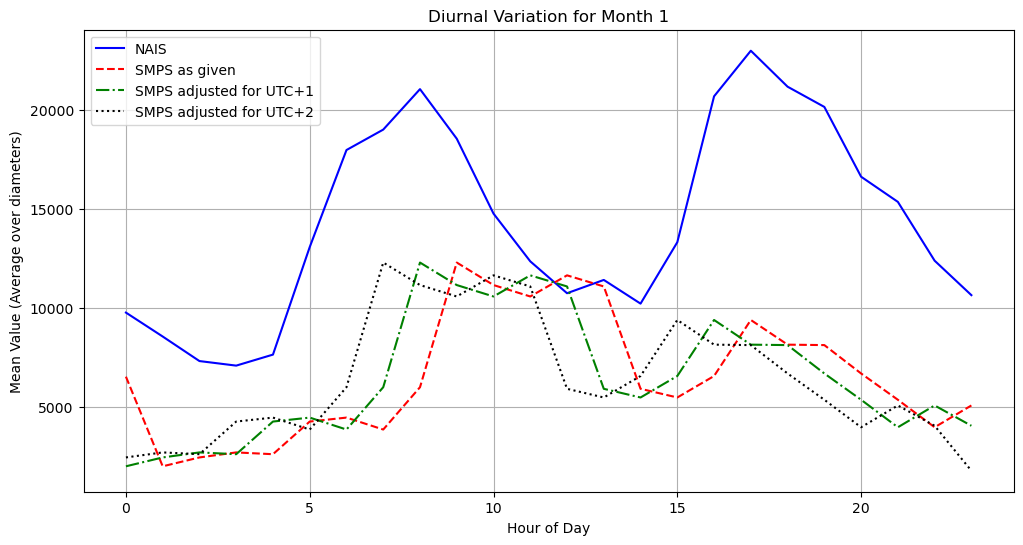

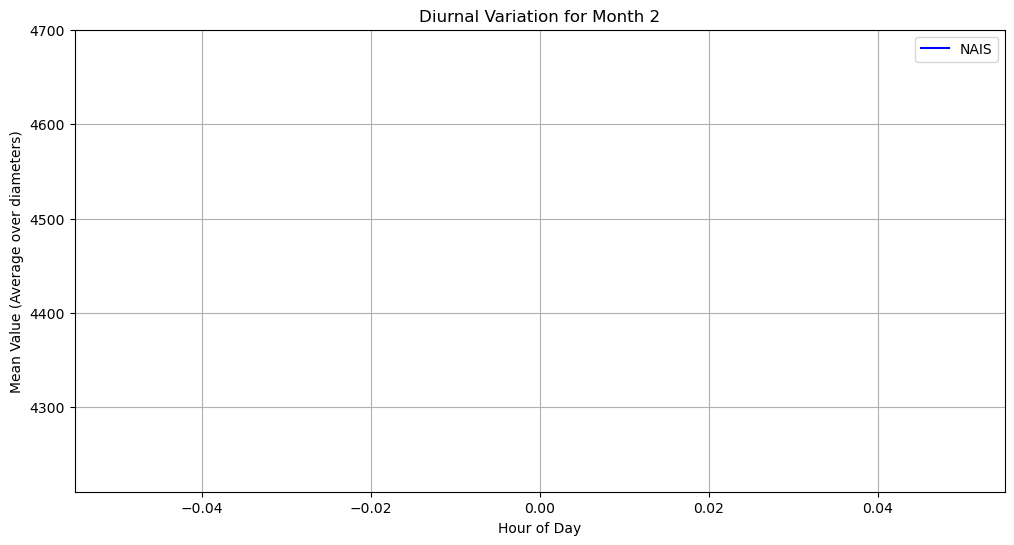

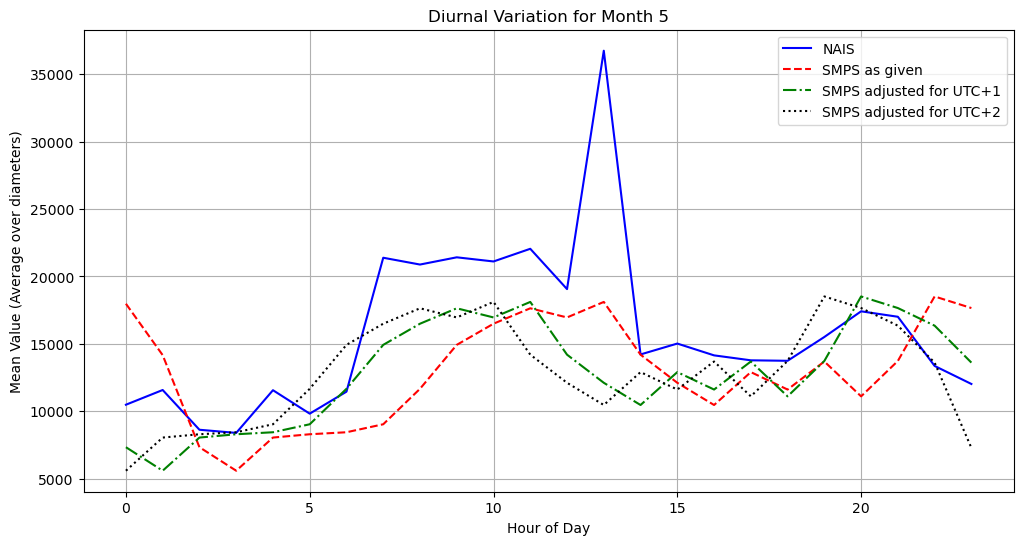

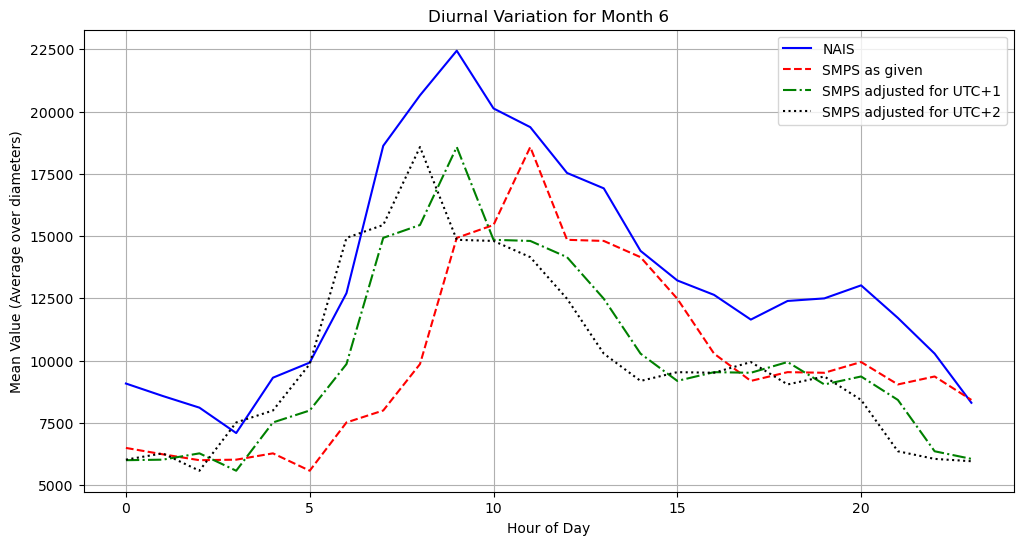

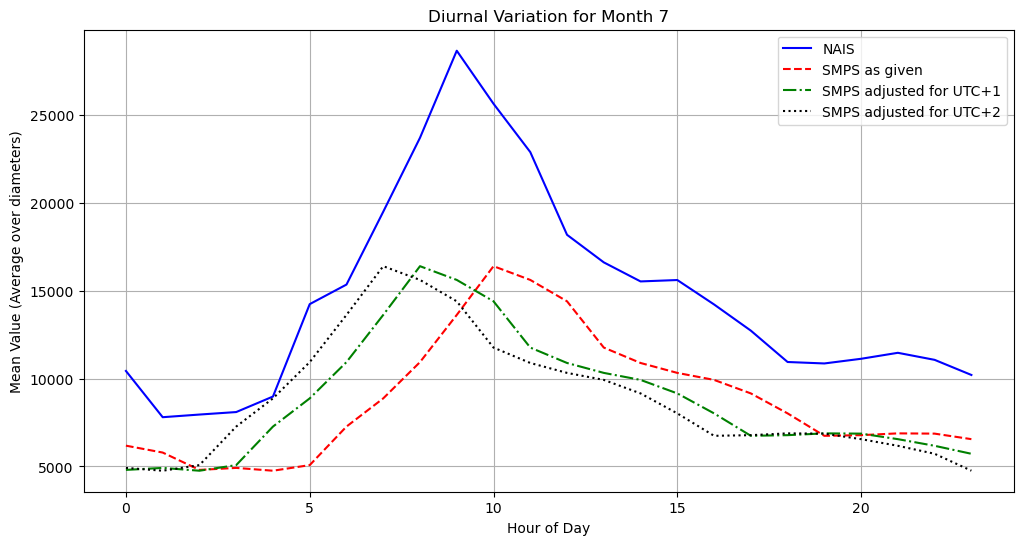

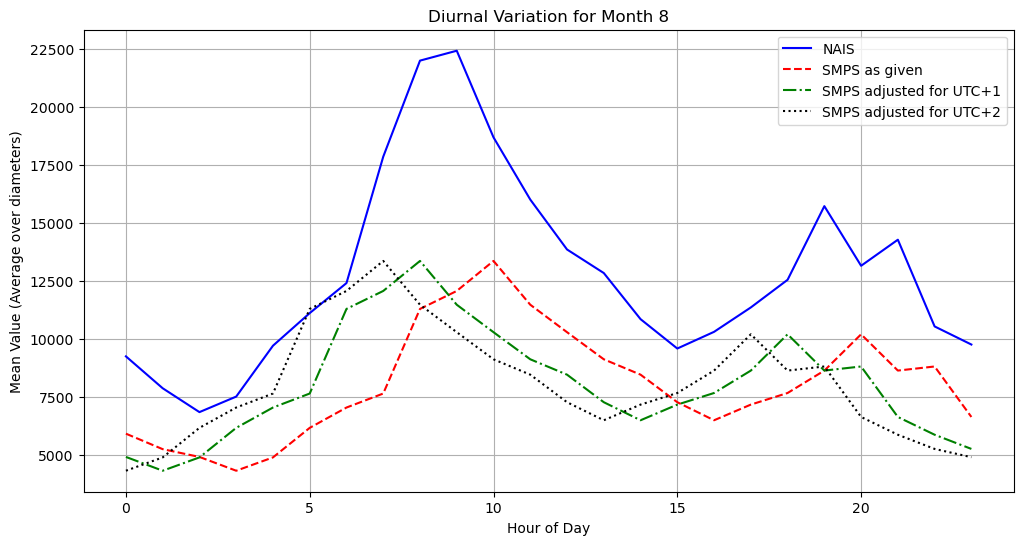

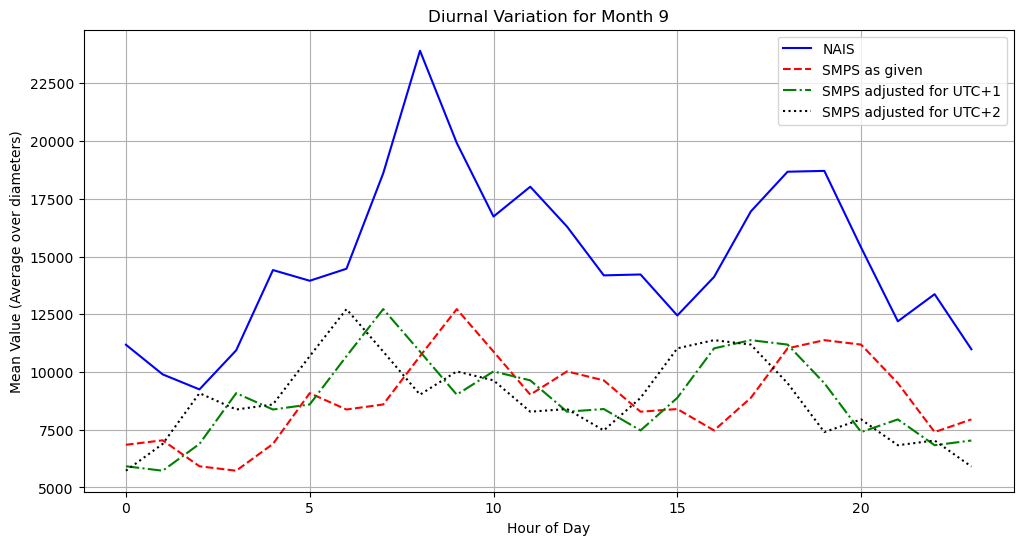

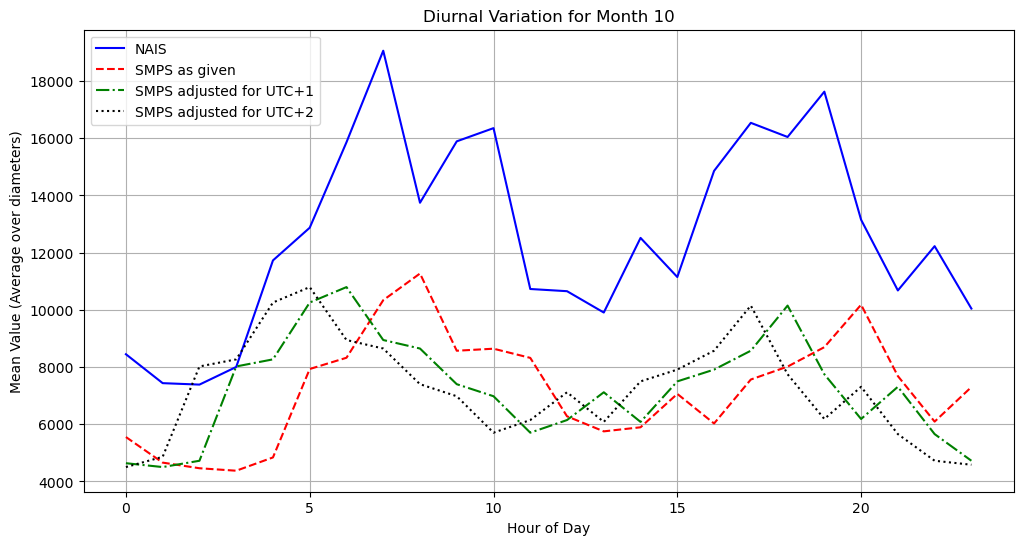

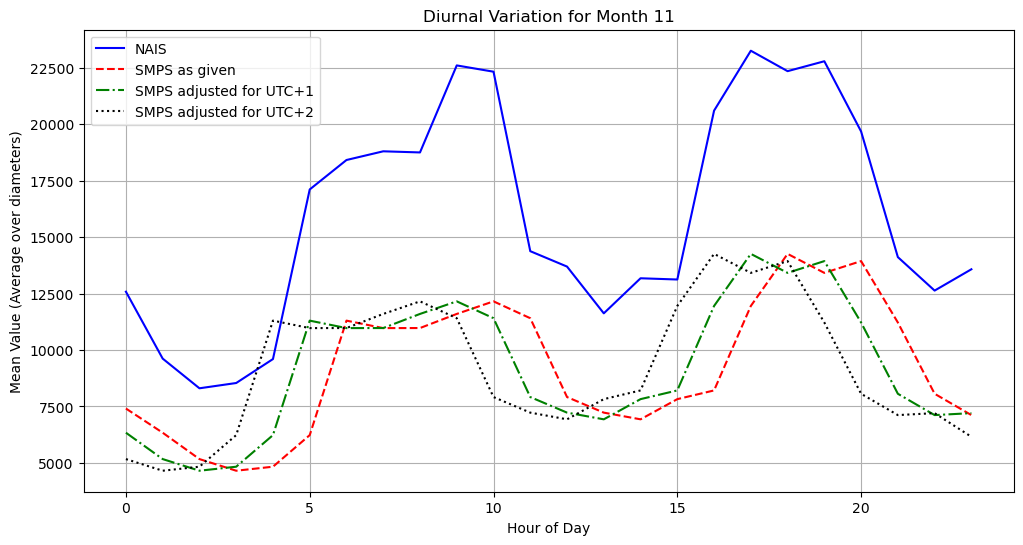

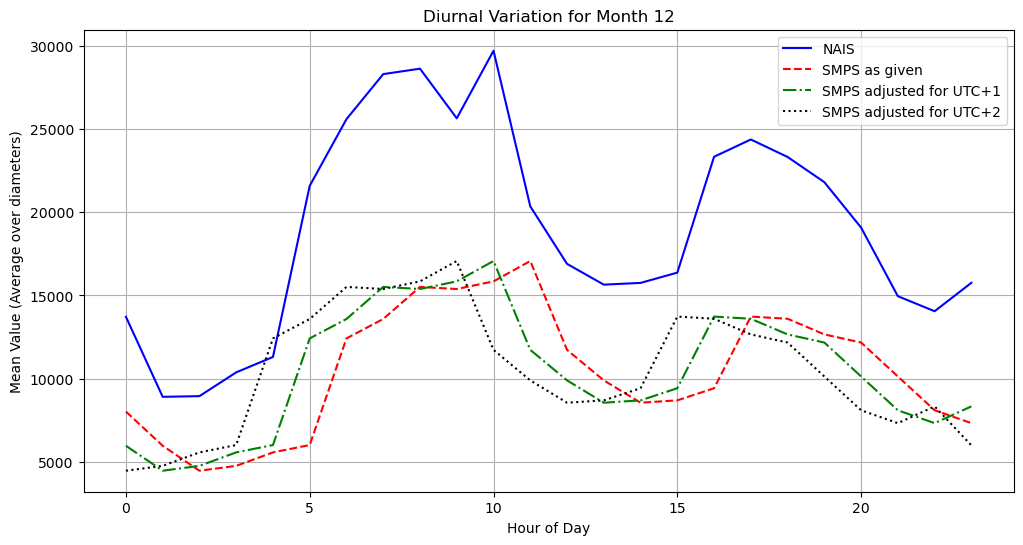

In [29]:
import matplotlib.pyplot as plt

# Group by month and hour using the datetime index attributes directly
df1_grouped = df1_subset.groupby([df1_subset.index.month, df1_subset.index.hour]).mean()
df2_grouped = df2_subset.groupby([df2_subset.index.month, df2_subset.index.hour]).mean()
df3_grouped = df3_subset.groupby([df3_subset.index.month, df3_subset.index.hour]).mean()
df4_grouped = df4_subset.groupby([df4_subset.index.month, df4_subset.index.hour]).mean()

# Loop through each month (1 to 12)
for month in range(1, 13):
    # Skip month if neither dataframe has data for it
    if month not in df1_grouped.index.levels[0] and month not in df2_grouped.index.levels[0] and month not in df3_grouped.index.levels[0] and month not in df4_grouped.index.levels[0]:
        continue

    plt.figure(figsize=(12, 6))
    
    # Plot for df1_subset if data is available
    if month in df1_grouped.index.levels[0]:
        df1_month = df1_grouped.loc[month]
        # Compute the mean across all diameter columns (averaging over axis=1)
        df1_avg = df1_month.mean(axis=1)
        plt.plot(df1_avg.index, df1_avg, label='NAIS', color='blue')
    
    # Plot for df2_subset if data is available
    if month in df2_grouped.index.levels[0]:
        df2_month = df2_grouped.loc[month]
        df2_avg = df2_month.mean(axis=1)
        plt.plot(df2_avg.index, df2_avg, label='SMPS as given', color='red', linestyle='--')

    # Plot for df3_subset if data is available
    if month in df3_grouped.index.levels[0]:
        df3_month = df3_grouped.loc[month]
        df3_avg = df3_month.mean(axis=1)
        plt.plot(df3_avg.index, df3_avg, label='SMPS adjusted for UTC+1', color='green', linestyle='-.')

    # Plot for df4_subset if data is available
    if month in df4_grouped.index.levels[0]:
        df4_month = df4_grouped.loc[month]
        df4_avg = df4_month.mean(axis=1)
        plt.plot(df4_avg.index, df4_avg, label='SMPS adjusted for UTC+2', color='black', linestyle=':')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Value (Average over diameters)')
    plt.title(f'Diurnal Variation for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.show()


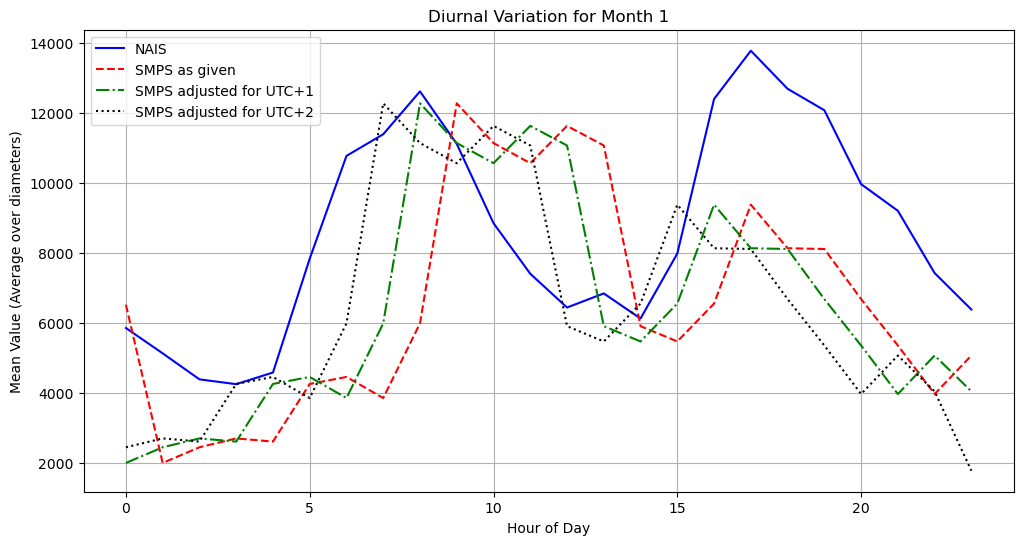

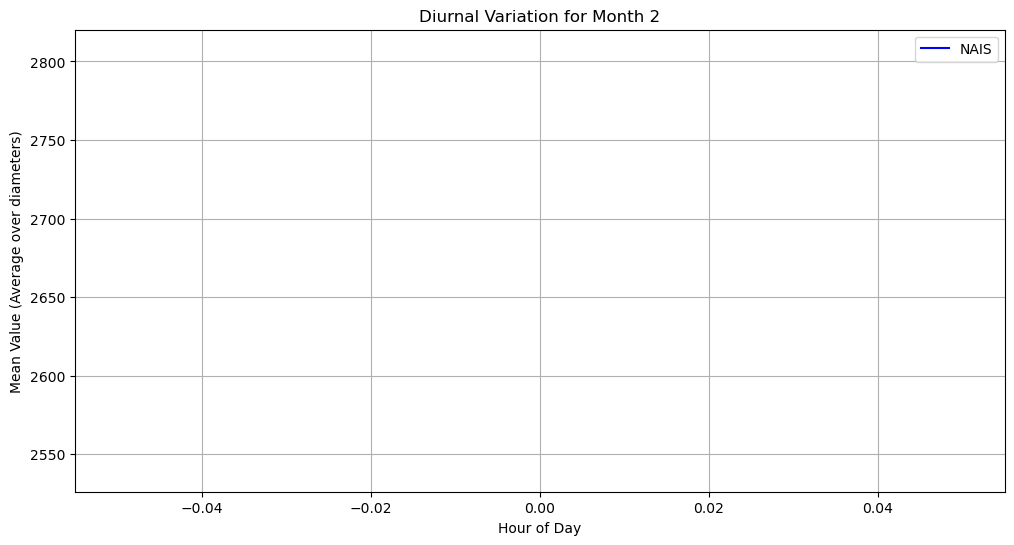

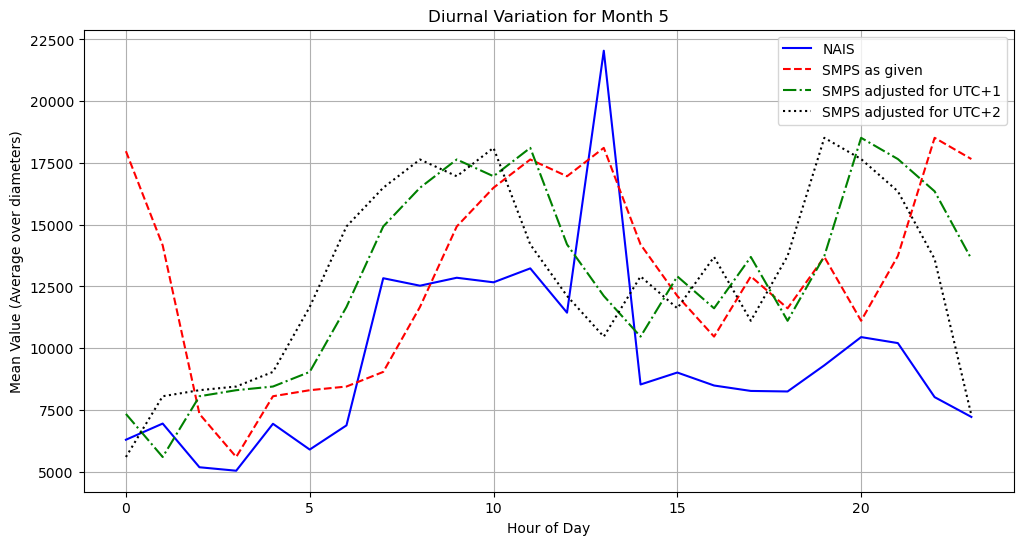

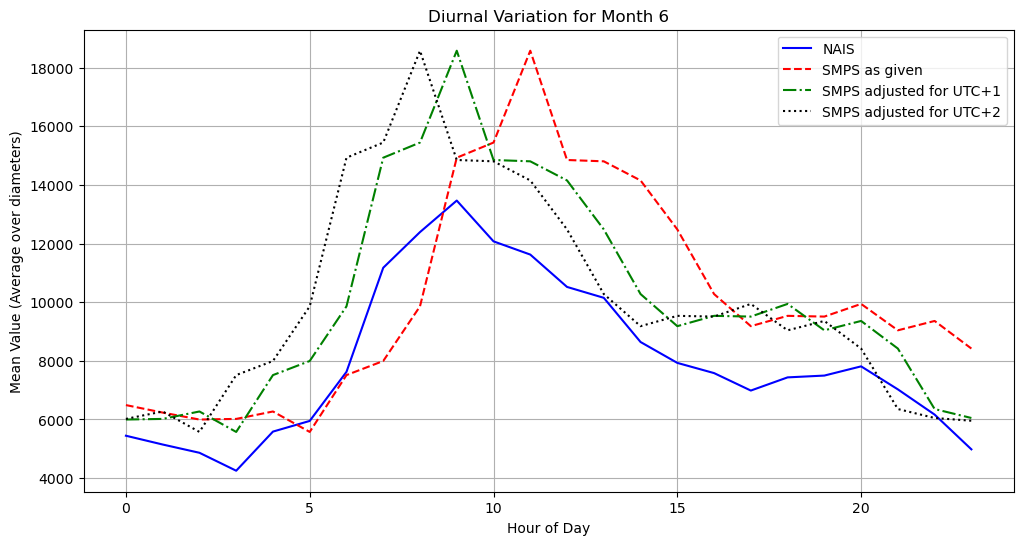

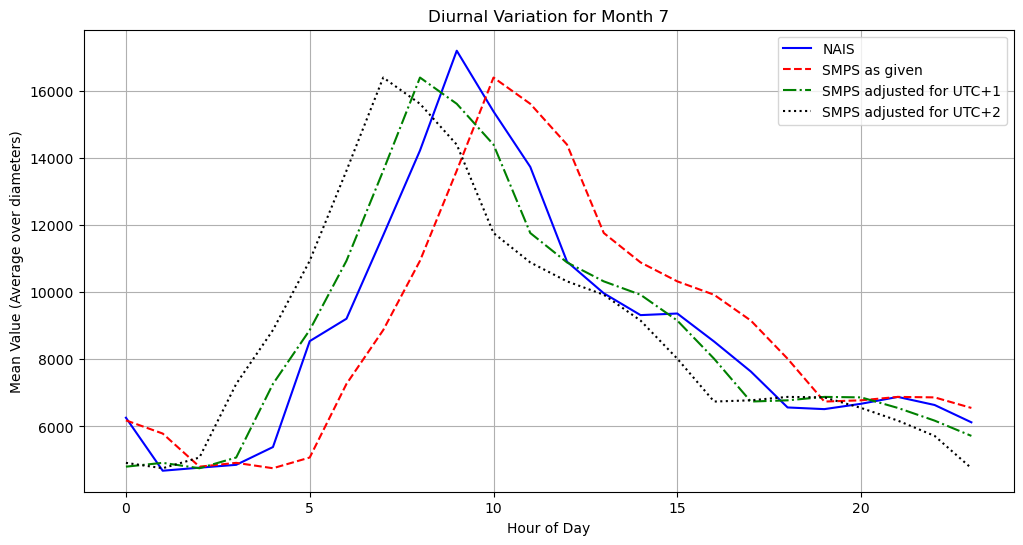

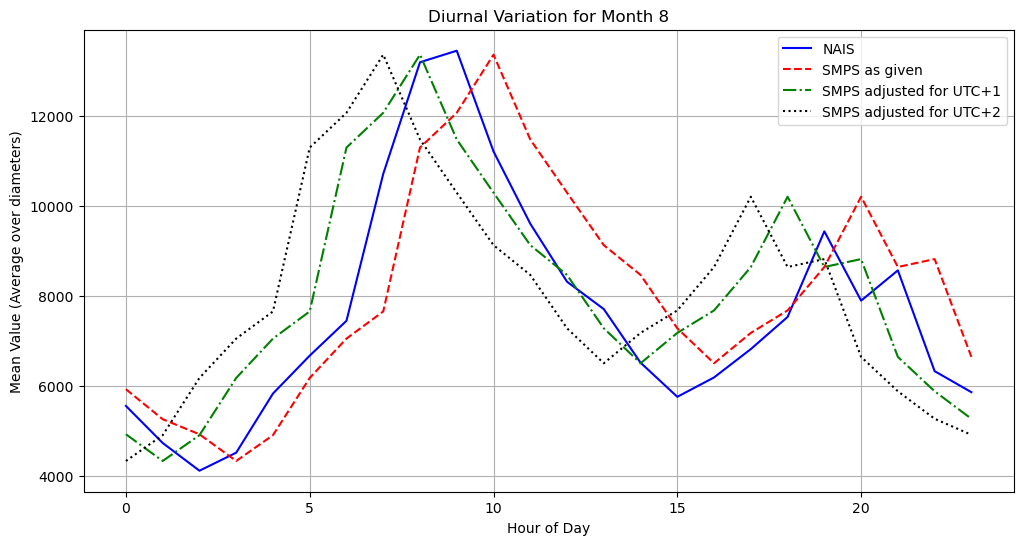

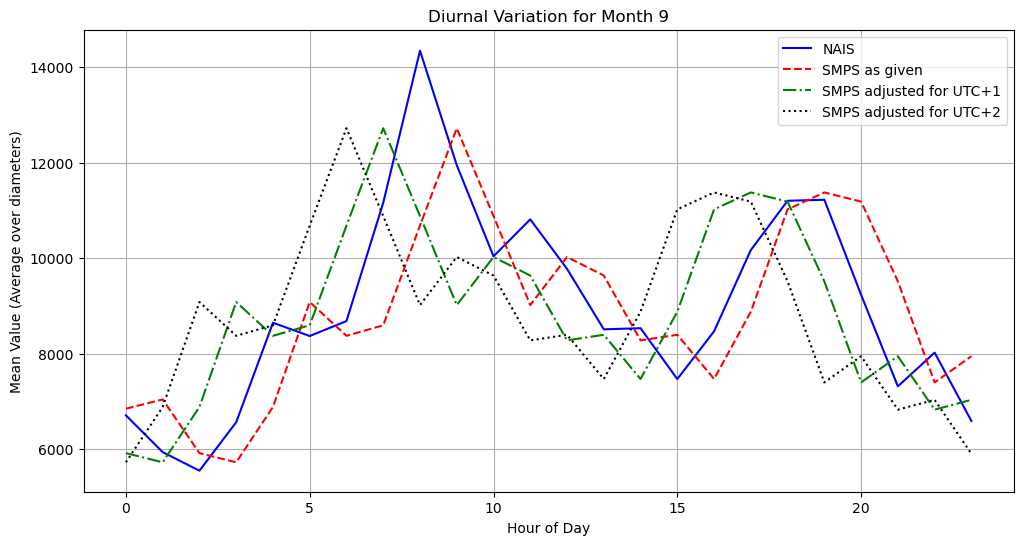

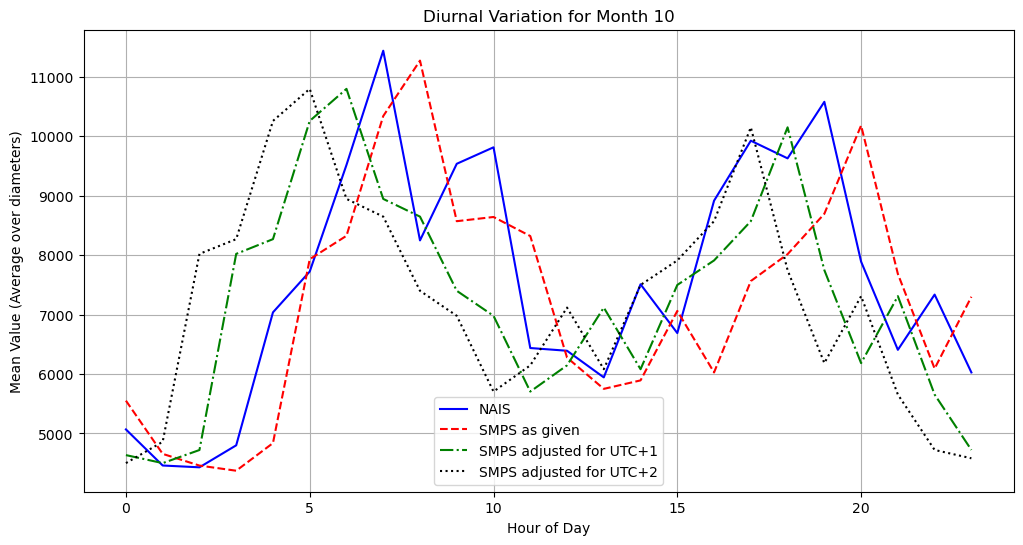

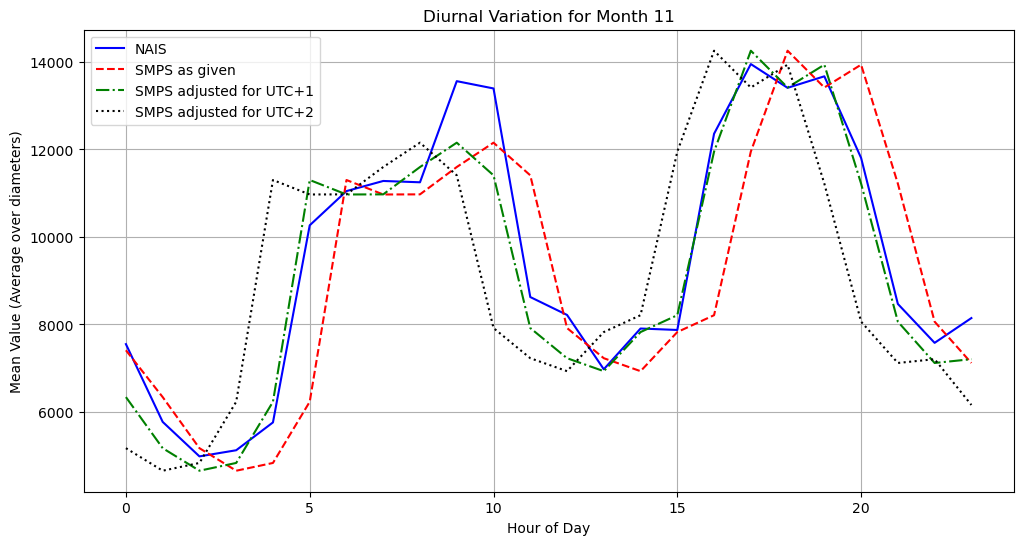

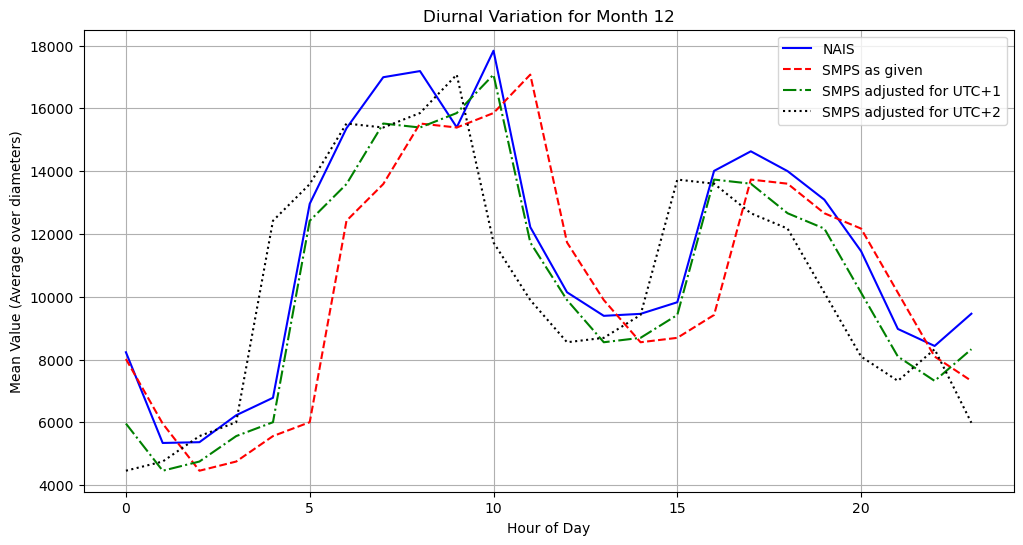

In [37]:
import matplotlib.pyplot as plt

# Group by month and hour using the datetime index attributes directly
df1_grouped = (df1_subset*0.6).groupby([df1_subset.index.month, df1_subset.index.hour]).mean()
df2_grouped = df2_subset.groupby([df2_subset.index.month, df2_subset.index.hour]).mean()
df3_grouped = df3_subset.groupby([df3_subset.index.month, df3_subset.index.hour]).mean()
df4_grouped = df4_subset.groupby([df4_subset.index.month, df4_subset.index.hour]).mean()

# Loop through each month (1 to 12)
for month in range(1, 13):
    # Skip month if neither dataframe has data for it
    if month not in df1_grouped.index.levels[0] and month not in df2_grouped.index.levels[0] and month not in df3_grouped.index.levels[0] and month not in df4_grouped.index.levels[0]:
        continue

    plt.figure(figsize=(12, 6))
    
    # Plot for df1_subset if data is available
    if month in df1_grouped.index.levels[0]:
        df1_month = df1_grouped.loc[month]
        # Compute the mean across all diameter columns (averaging over axis=1)
        df1_avg = df1_month.mean(axis=1)
        plt.plot(df1_avg.index, df1_avg, label='NAIS', color='blue')
    
    # Plot for df2_subset if data is available
    if month in df2_grouped.index.levels[0]:
        df2_month = df2_grouped.loc[month]
        df2_avg = df2_month.mean(axis=1)
        plt.plot(df2_avg.index, df2_avg, label='SMPS as given', color='red', linestyle='--')

    # Plot for df3_subset if data is available
    if month in df3_grouped.index.levels[0]:
        df3_month = df3_grouped.loc[month]
        df3_avg = df3_month.mean(axis=1)
        plt.plot(df3_avg.index, df3_avg, label='SMPS adjusted for UTC+1', color='green', linestyle='-.')

    # Plot for df4_subset if data is available
    if month in df4_grouped.index.levels[0]:
        df4_month = df4_grouped.loc[month]
        df4_avg = df4_month.mean(axis=1)
        plt.plot(df4_avg.index, df4_avg, label='SMPS adjusted for UTC+2', color='black', linestyle=':')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Value (Average over diameters)')
    plt.title(f'Diurnal Variation for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [38]:
# Step 1: Localize the index to GMT+1
smps_simple = smps_hourly.copy()
smps_simple.index = smps_simple.index.tz_localize(pytz.FixedOffset(60))
# Step 2: Convert the timezone to GMT (UTC)
smps_simple.index = smps_simple.index.tz_convert(pytz.utc)
# Step 3: Remove the timezone information
smps_simple.index =smps_simple.index.tz_localize(None)
smps_simple

13.10         13.58         14.07         14.59   \
datetime                                                                      
2024-05-27 00:00:00   8811.322333   8678.075917   9266.824917   9377.964333   
2024-05-27 01:00:00   4429.959083   4358.088333   4344.621250   4304.902167   
2024-05-27 02:00:00   3066.354833   3173.748583   3122.135917   2978.556000   
2024-05-27 03:00:00   5049.580833   5031.680750   4982.155250   4965.630667   
2024-05-27 04:00:00  18216.605000  17988.454167  18155.535833  18113.580000   
...                           ...           ...           ...           ...   
2025-01-03 18:00:00   1769.567250   1892.247083   1864.031333   2021.519083   
2025-01-03 19:00:00   1428.189500   1463.220583   1480.338250   1520.237083   
2025-01-03 20:00:00   1987.029000   1965.438667   1840.511083   1710.992583   
2025-01-03 21:00:00   1839.318500   1702.624417   1671.645417   1471.335583   
2025-01-03 22:00:00    924.474000    981.417417    979.036667    949.285333   

                           15.12         15.68         16.25         16.85   \
datetime                                                                      
2024-05-27 00:00:00   9282.293083   9096.008000   9275.907667   9269.819333   
2024-05-27 01:00:00   4136.608167   4028.853417   4032.931750   4203.240667   
2024-05-27 02:00:00   3014.488333   3055.383750   3260.841250   3081.271917   
2024-05-27 03:00:00   4780.458167   4913.020333   4779.355167   4768.674250   
2024-05-27 04:00:00  18312.641667  17653.875833  17703.387500  17534.786667   
...                           ...           ...           ...           ...   
2025-01-03 18:00:00   2054.907917   2101.978917   2260.284583   2452.201833   
2025-01-03 19:00:00   1482.525417   1490.534250   1701.928167   1639.611750   
2025-01-03 20:00:00   1657.355583   1514.403500   1472.869667   1349.815417   
2025-01-03 21:00:00   1449.420417   1366.046000   1315.948833   1322.540667   
2025-01-03 22:00:00    937.774833    909.495750    927.456333    922.119917   

                           17.47         18.11   ...      513.97      532.80  \
datetime                                         ...                           
2024-05-27 00:00:00   9242.619917   9080.413500  ...   42.062333   37.672750   
2024-05-27 01:00:00   4163.286417   4235.815500  ...   21.677333   20.849500   
2024-05-27 02:00:00   3178.804167   3182.493583  ...   12.386250   14.479833   
2024-05-27 03:00:00   4823.262333   4806.402583  ...   19.427250   16.303000   
2024-05-27 04:00:00  17150.619167  16700.647500  ...   36.383833   26.155583   
...                           ...           ...  ...         ...         ...   
2025-01-03 18:00:00   2500.159250   2454.345000  ...  218.366417  193.862333   
2025-01-03 19:00:00   1628.718250   1701.716833  ...  213.268583  156.107167   
2025-01-03 20:00:00   1365.158417   1309.541000  ...  172.406083  141.855500   
2025-01-03 21:00:00   1318.180750   1266.311500  ...  156.634417  120.422250   
2025-01-03 22:00:00    916.401250    962.751167  ...  150.482167  126.027333   

                         552.32      572.55      593.52     615.27     637.80  \
datetime                                                                        
2024-05-27 00:00:00   24.605417   23.219667   24.000083  21.997500  13.720667   
2024-05-27 01:00:00   12.708333   11.025167   11.292417   8.359833   7.153250   
2024-05-27 02:00:00   14.915417   10.642083    8.877083   6.728333   7.200750   
2024-05-27 03:00:00   17.123083    7.431333    8.557583   7.472333   8.061667   
2024-05-27 04:00:00   24.751750   21.312917   19.476167  15.328667  15.482500   
...                         ...         ...         ...        ...        ...   
2025-01-03 18:00:00  164.756083  126.092667  103.537417  73.870167  62.510500   
2025-01-03 19:00:00  132.042500   95.857833   76.836000  65.078667  51.679500   
2025-01-03 20:00:00  115.529167   85.373750   58.416333  59.319083  37.506667   
2025-01-03 21:00:00  102.429167   81.61

In [39]:
# smps simple adjustment for UTC+1 time
selected_cols_df5 = [col for col in smps_simple.columns if 13 <= float(col) <= 42]
df5_subset = smps_simple[selected_cols_df5]

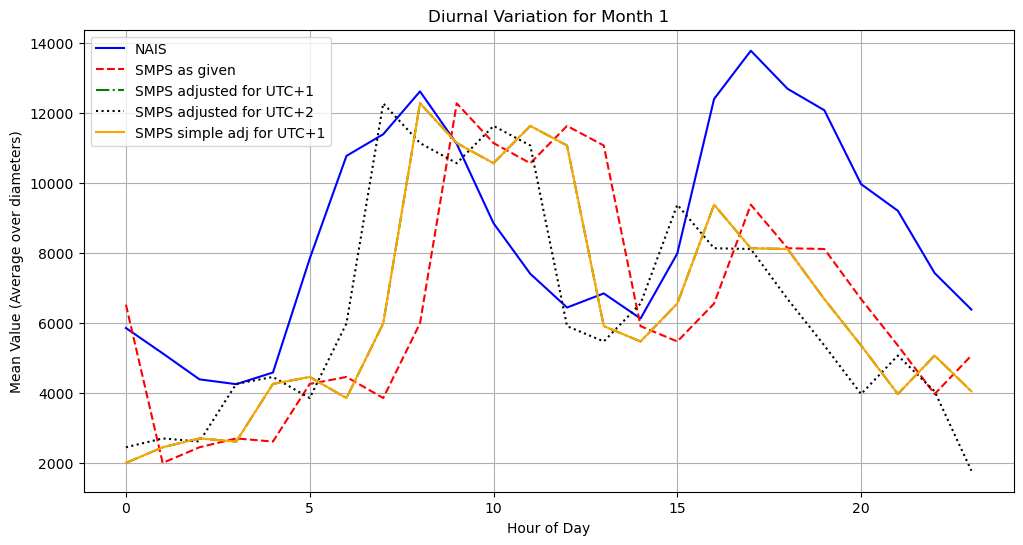

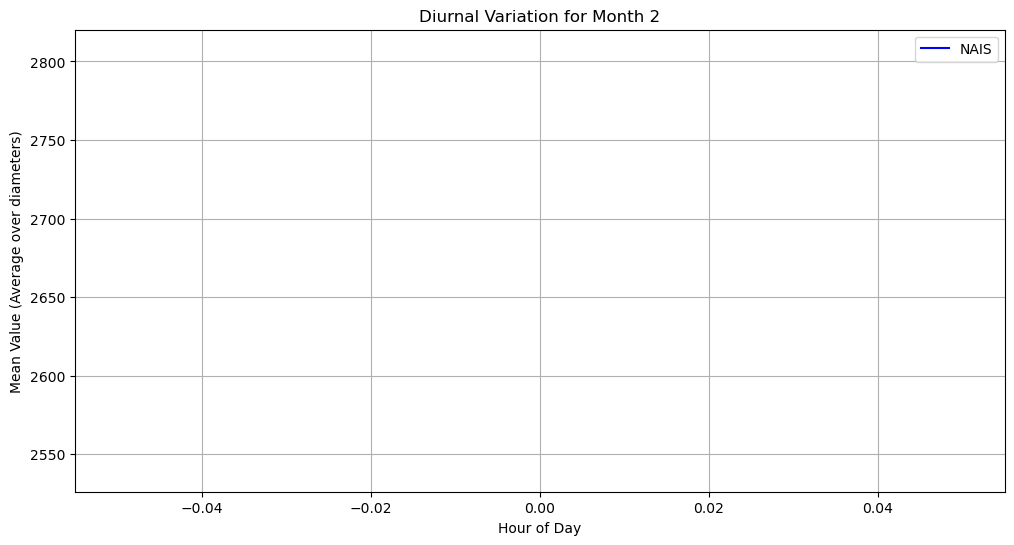

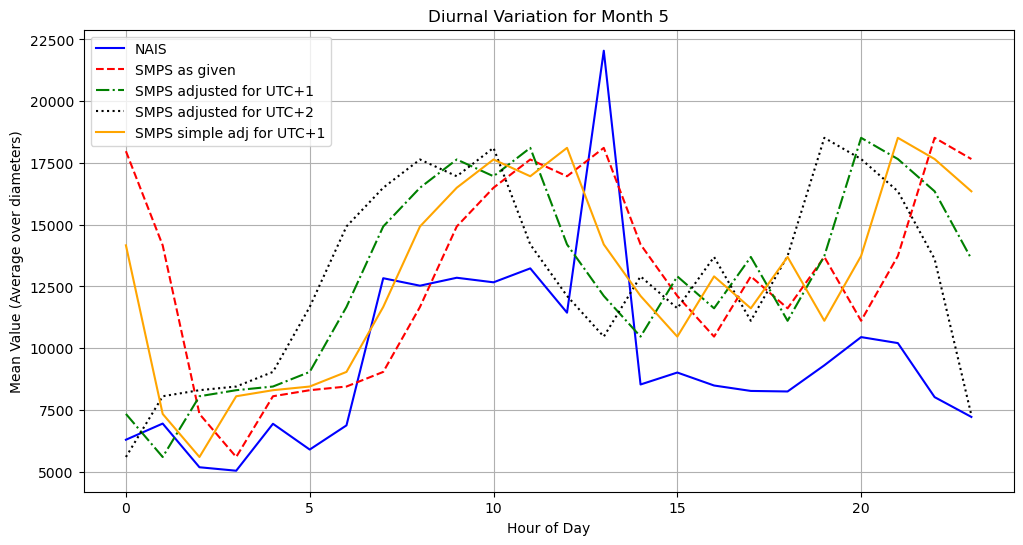

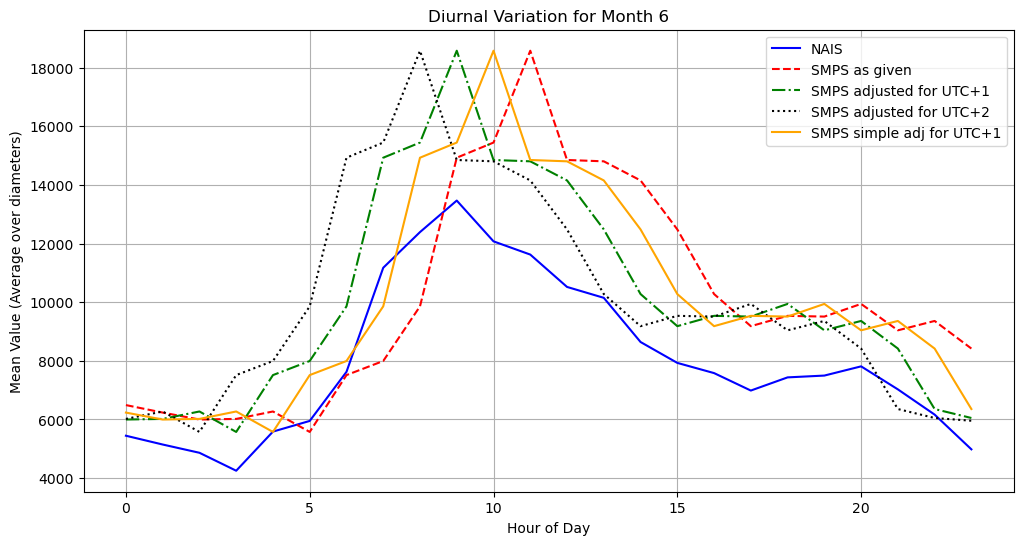

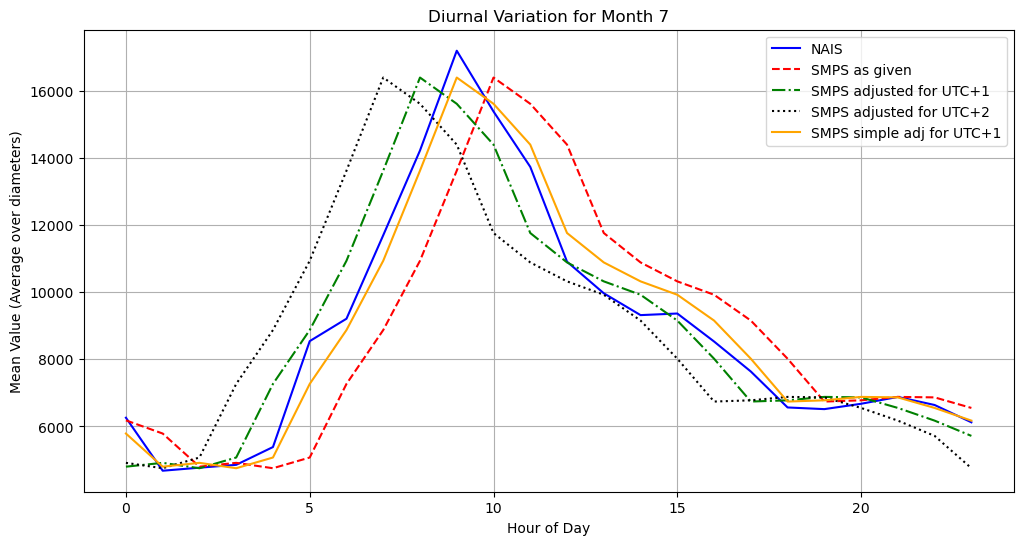

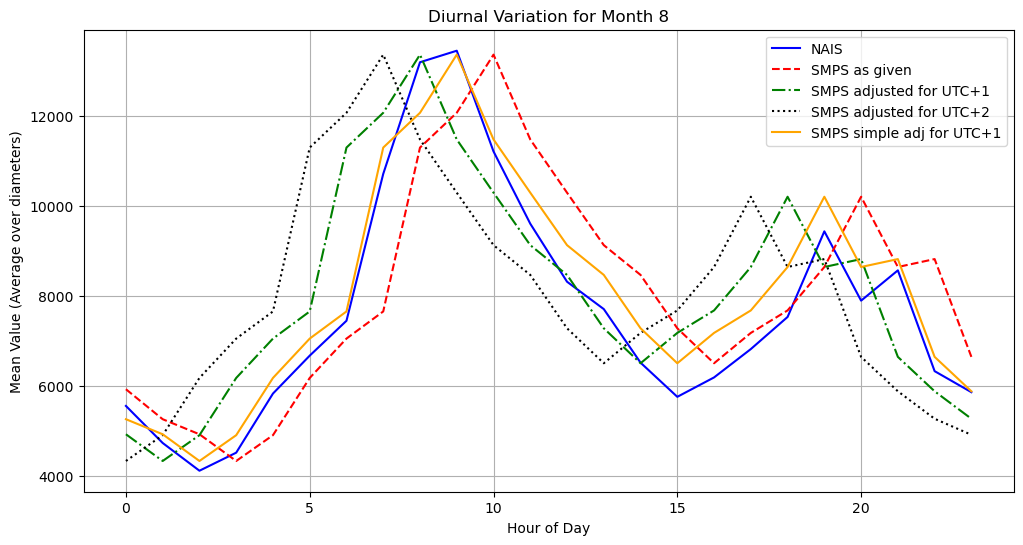

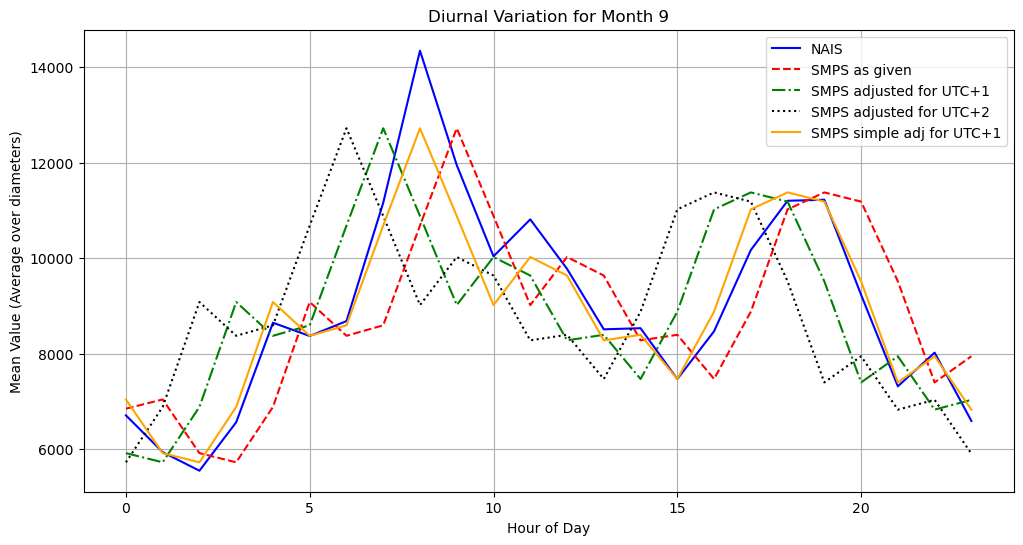

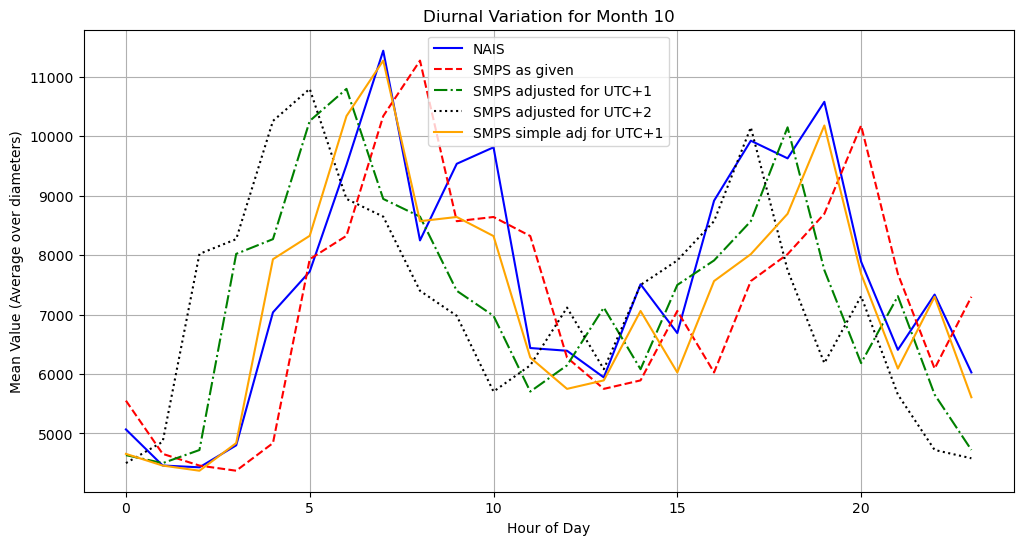

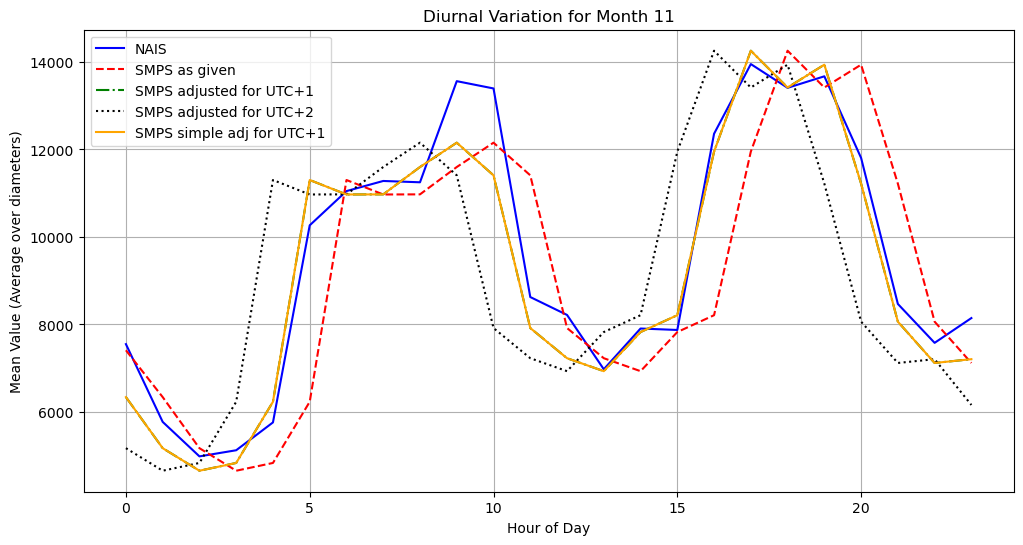

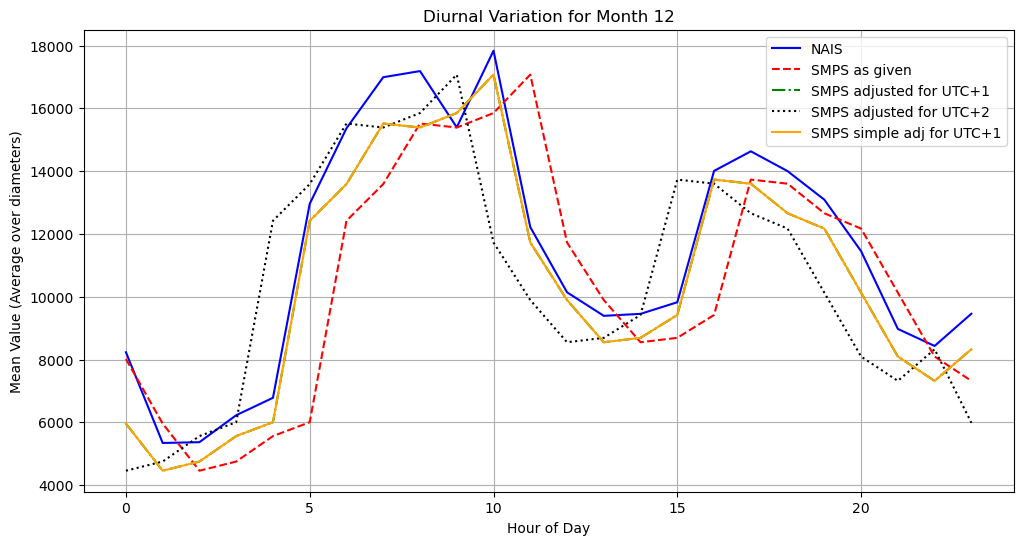

In [42]:
import matplotlib.pyplot as plt

# Group by month and hour using the datetime index attributes directly
df1_grouped = (df1_subset*0.6).groupby([df1_subset.index.month, df1_subset.index.hour]).mean()
df2_grouped = df2_subset.groupby([df2_subset.index.month, df2_subset.index.hour]).mean()
df3_grouped = df3_subset.groupby([df3_subset.index.month, df3_subset.index.hour]).mean()
df4_grouped = df4_subset.groupby([df4_subset.index.month, df4_subset.index.hour]).mean()
df5_grouped = df5_subset.groupby([df5_subset.index.month, df5_subset.index.hour]).mean()

# Loop through each month (1 to 12)
for month in range(1, 13):
    # Skip month if neither dataframe has data for it
    if month not in df1_grouped.index.levels[0] and month not in df2_grouped.index.levels[0] and month not in df3_grouped.index.levels[0] and month not in df4_grouped.index.levels[0] and month not in df5_grouped.index.levels[0]:
        continue

    plt.figure(figsize=(12, 6))
    
    # Plot for df1_subset if data is available
    if month in df1_grouped.index.levels[0]:
        df1_month = df1_grouped.loc[month]
        # Compute the mean across all diameter columns (averaging over axis=1)
        df1_avg = df1_month.mean(axis=1)
        plt.plot(df1_avg.index, df1_avg, label='NAIS', color='blue')
    
    # Plot for df2_subset if data is available
    if month in df2_grouped.index.levels[0]:
        df2_month = df2_grouped.loc[month]
        df2_avg = df2_month.mean(axis=1)
        plt.plot(df2_avg.index, df2_avg, label='SMPS as given', color='red', linestyle='--')

    # Plot for df3_subset if data is available
    if month in df3_grouped.index.levels[0]:
        df3_month = df3_grouped.loc[month]
        df3_avg = df3_month.mean(axis=1)
        plt.plot(df3_avg.index, df3_avg, label='SMPS adjusted for UTC+1', color='green', linestyle='-.')

    # Plot for df4_subset if data is available
    if month in df4_grouped.index.levels[0]:
        df4_month = df4_grouped.loc[month]
        df4_avg = df4_month.mean(axis=1)
        plt.plot(df4_avg.index, df4_avg, label='SMPS adjusted for UTC+2', color='black', linestyle=':')
        
    # Plot for df5_subset if data is available
    if month in df5_grouped.index.levels[0]:
        df5_month = df5_grouped.loc[month]
        df5_avg = df5_month.mean(axis=1)
        plt.plot(df5_avg.index, df5_avg, label='SMPS simple adj for UTC+1', color='orange', linestyle='-')
    
    plt.xlabel('Hour of Day')
    plt.ylabel('Mean Value (Average over diameters)')
    plt.title(f'Diurnal Variation for Month {month}')
    plt.legend()
    plt.grid(True)
    plt.show()
